In [2]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [134]:
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

## Merge datasets

In [2]:
folder_path = './'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')
sub = pd.read_csv(f'{folder_path}sample_submission.csv')
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [3]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [4]:
# delete useless variables
del train_identity, train_transaction, test_identity, test_transaction

## Drop the columns with 85% or more null values
The transaction table has more cases of missing data. 55 of the 394 features have more than 80% missing data, and 113 features have missing data between 70% and 80%. Similar missing data patterns were found among features which have consecutive names. Specifically, the missing data rates of "D6"-"D9" and "D12"-"D14" were all above 87.3122%. The missing data rate of "D6" - "D9" and "D12" - "D14" was above 87.3122%. The missing data rate for "V138" - "V166" is between 86.1227% and 86.1237%. All features from "V323" to "V339" have missing data rate of 86.054967%. This regularity exhibited in the missing data suggests that there may have a strong correlation between these consecutive numerically arranged features, although the data provider does not explain the specific meaning expressed by these encrypted features.

In [5]:
list_drop_89 = []
for i in list(range(6,10)):
    add ="D" + str(i)
    #print(add)
    list_drop_89.append(add)
for i in list(range(12,15)):
    add ="D" + str(i)
    #print(add)
    list_drop_89.append(add)
print("list_drop_89: ",list_drop_89)

list_drop_86 = []
for i in list(range(138,167)):
    add ="V" + str(i) 
    #print(add)
    list_drop_86.append(add)
print("list_drop_86: ",list_drop_86)

list_drop_85 = []
for i in list(range(323,340)):
    add ="V" + str(i) 
    #print(add)
    list_drop_85.append(add)
print("list_drop_85: ",list_drop_85)

list_drop_89:  ['D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14']
list_drop_86:  ['V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166']
list_drop_85:  ['V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']


In [7]:
droplist= list_drop_89 + list_drop_86 + list_drop_85
print(droplist)

['D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']


In [8]:
# delete useless variables
del list_drop_89, list_drop_86, list_drop_85

In [9]:
train.drop(droplist, 1,inplace = True)
test.drop(droplist, 1,inplace = True)
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 381 columns.
Test dataset has 506691 rows and 380 columns.


## clean up the features based on their email domain (“P_emaildomain” and “R_emaildomain”)
we need to clean up the features based on their email domain (“P_emaildomain” and “R_emaildomain”). Because some of the email domain will separate from the different countries. For example, “yahoo.co.jp”, “yahoo.de”, “yahoo.fr”. What we need here is just the information of email provider. So, all three records above will be converted to “yahoo”

In [59]:
for col in ['P_emaildomain','R_emaildomain']:
    #For train
    train.loc[train[col].isin(['yahoo.co.jp','yahoo.co.uk', 'yahoo.com', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es',
       'yahoo.fr', 'ymail.com']),col] = "Yahoo"
    train.loc[train[col].isin(['gmail','gmail.com']),col] = "Gmail"
    train.loc[train[col].isin(['hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr']),col] = "Hotmail"
    train.loc[train[col].isin(['live.com', 'live.com.mx', 'live.fr']),col] = "Live"
    train.loc[train[col].isin(['outlook.com', 'outlook.es']),col] = "Outlook"
    train.loc[train[col].isin(['netzero.com', 'netzero.net']),col] = "Netzero"
    train.loc[train[col].isin(['frontier.com', 'frontiernet.net']),col] = "Frontiernet"
    # For test
    test.loc[test[col].isin(['yahoo.co.jp','yahoo.co.uk', 'yahoo.com', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es',
       'yahoo.fr', 'ymail.com']),col] = "Yahoo"
    test.loc[test[col].isin(['gmail','gmail.com']),col] = "Gmail"
    test.loc[test[col].isin(['hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr']),col] = "Hotmail"
    test.loc[test[col].isin(['live.com', 'live.com.mx', 'live.fr']),col] = "Live"
    test.loc[test[col].isin(['outlook.com', 'outlook.es']),col] = "Outlook"
    test.loc[test[col].isin(['netzero.com', 'netzero.net']),col] = "Netzero"
    test.loc[test[col].isin(['frontier.com', 'frontiernet.net']),col] = "Frontiernet"


In [60]:
#check
p = train['P_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'servicios-ta.com',
       'suddenlink.net', 'twc.com', 'verizon.net', 'web.de',
       'windstream.net'], dtype=object)

In [61]:
#check
p = test['P_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu',
       'servicios-ta.com', 'suddenlink.net', 'twc.com', 'verizon.net',
       'web.de', 'windstream.net'], dtype=object)

In [62]:
#check
p = train['R_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu',
       'servicios-ta.com', 'suddenlink.net', 'twc.com', 'verizon.net',
       'web.de', 'windstream.net'], dtype=object)

In [63]:
#check
p = test['R_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu',
       'servicios-ta.com', 'suddenlink.net', 'twc.com', 'verizon.net',
       'web.de', 'windstream.net'], dtype=object)

## time-based split

A very important idea: it seems that train and test transaction dates don't overlap, so it would be prudent to use time-based split for validation. This was already noted in abother kernel: https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda

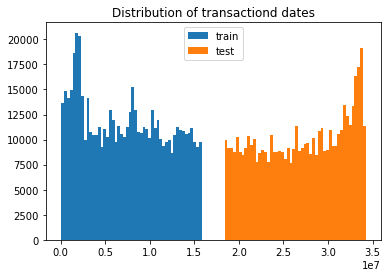

In [71]:
%matplotlib inline
plt.hist(train['TransactionDT'], label='train', bins=50);
plt.hist(test['TransactionDT'], label='test', bins = 50);
plt.legend();
plt.title('Distribution of transactiond dates');

## clean up the features “DeviceInfo” 

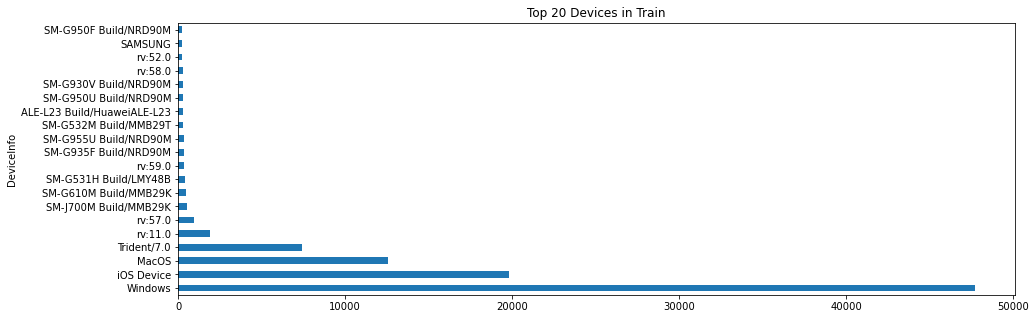

In [77]:
train.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

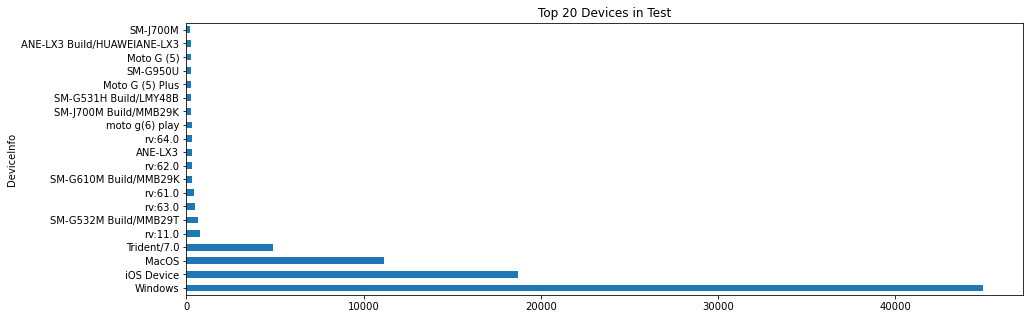

In [78]:
test.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Test')
plt.show()

Note: (1)It is important to be careful here - some of info could be for old devices and may be absent from test data.
    (2)“DeviceInfo” record different versions of devices, such as Windows or IOS. 
        We can find information like “Windows 10”, “Windows 7”, “iso 11.2.1”, “iso 11.1.2”, “iso 11.4.1”.
        However, the versions don’t split different users. What we needed is just the base of the operation system. 
        So we transfer different versions of device’s record in to one record. 

In [97]:
#some of info could be for old devices and may be absent from test data
(~train['DeviceInfo'].isin(test['DeviceInfo'])).any()

True

In [98]:
(~test['DeviceInfo'].isin(train['DeviceInfo'])).any()

True

In [114]:
train_device=train['DeviceInfo'].unique().tolist()
test_device=test['DeviceInfo'].unique().tolist()
old_device = list(set(train_device)-set(test_device))
#print(old_device)
len(old_device)

573

In [169]:
for data in [train, test]:
    data.loc[data['DeviceInfo'].isin(['vivo','Vivo']),'DeviceInfo'] = "Vivo"
    data.loc[data['DeviceInfo'].isin(old_device),'DeviceInfo'] = "Old_Device"
    data.loc[data['DeviceInfo'].isin(['Blade A475 Build/LMY47D', 'Blade A510 Build/MRA58K', 'Blade L2 Plus Build/KOT49H', 'Blade L3 Build/KOT49H', 'Blade L5 Build/LMY47I', 'Blade V580 Build/LMY47D', 'Blade V6 Build/LRX22G', 'Blade V6 Max Build/MRA58K', 'Blade V6 Plus Build/MRA58K']),'DeviceInfo'] = "Blade"
    data.loc[data['DeviceInfo'].isin(['Android', 'Android 4.4.2', 'Android 5.1', 'Android 5.1.1', 'Android 6.0', 'Android 6.0.1', 'Android 7.0', 'Android 7.1.2']),'DeviceInfo'] = "Android"
    data.loc[data['DeviceInfo'].isin(['Blade A475 Build/LMY47D', 'Blade A510 Build/MRA58K', 'Blade L2 Plus Build/KOT49H', 'Blade L3 Build/KOT49H', 'Blade L5 Build/LMY47I', 'Blade V580 Build/LMY47D', 'Blade V6 Build/LRX22G', 'Blade V6 Max Build/MRA58K', 'Blade V6 Plus Build/MRA58K']),'DeviceInfo'] = "Blade"
    data.loc[data['DeviceInfo'].isin(['HUAWEI', 'HUAWEI Build/MMB28B', 'HUAWEI CAN-L01 Build/HUAWEICAN-L01', 'HUAWEI CAN-L11 Build/HUAWEICAN-L11', 'HUAWEI CUN-L03 Build/HUAWEICUN-L03', 'HUAWEI G7-L03 Build/HuaweiG7-L03', 'HUAWEI GRA-L09 Build/HUAWEIGRA-L09', 'HUAWEI LUA-U23 Build/HUAWEILUA-U23', 'HUAWEI LYO-L21 Build/HUAWEILYO-L21', 'HUAWEI M2-801W Build/HUAWEIM2-801W', 'HUAWEI NXT-L09 Build/HUAWEINXT-L09', 'HUAWEI RIO-L03 Build/HUAWEIRIO-L03', 'HUAWEI TAG-L13 Build/HUAWEITAG-L13', 'HUAWEI VNS-L21 Build/HUAWEIVNS-L21', 'HUAWEI VNS-L23 Build/HUAWEIVNS-L23', 'HUAWEI VNS-L31 Build/HUAWEIVNS-L31', 'HUAWEI VNS-L53 Build/HUAWEIVNS-L53', 'HUAWEI Y360-U23 Build/HUAWEIY360-U23', 'HUAWEI Y520-U03 Build/HUAWEIY520-U03', 'HUAWEI Y560-L03 Build/HUAWEIY560-L03', 'HUAWEI Y625-U13 Build/HUAWEIY625-U13','WAS-L03T Build/HUAWEIWAS-L03T', 'WAS-LX1 Build/HUAWEIWAS-LX1', 'WAS-LX1A Build/HUAWEIWAS-LX1A','BLA-L09 Build/HUAWEIBLA-L09','BLA-L29 Build/HUAWEIBLA-L29','BAH-L09 Build/HUAWEIBAH-L09','ALP-L09 Build/HUAWEIALP-L09S','ALE-L21 Build/HuaweiALE-L21', 'ALE-L23 Build/HuaweiALE-L23', 'ALP-L09 Build/HUAWEIALP-L09', 'ALP-L09 Build/HUAWEIALP-L09S','BAC-L03 Build/HUAWEIBAC-L03','BLL-L23 Build/HUAWEIBLL-L23','CRO-L03 Build/HUAWEICRO-L03','CAM-L03 Build/HUAWEICAM-L03','CHC-U03 Build/HuaweiCHC-U03','CAM-L03 Build/HUAWEICAM-L03','EML-L29 Build/HUAWEIEML-L29', 'EVA-L09 Build/HUAWEIEVA-L09', 'EVA-L19 Build/HUAWEIEVA-L19','FIG-LX3 Build/HUAWEIFIG-LX3','FRD-L04 Build/HUAWEIFRD-L04', 'FRD-L09 Build/HUAWEIFRD-L09', 'FRD-L14 Build/HUAWEIFRD-L14','H1711 Build/HUAWEIH1711','PRA-LX1 Build/HUAWEIPRA-LX1', 'PRA-LX3 Build/HUAWEIPRA-LX3','MYA-L13 Build/HUAWEIMYA-L13','RNE-L03 Build/HUAWEIRNE-L03', 'RNE-L21 Build/HUAWEIRNE-L21', 'RNE-L22 Build/HUAWEIRNE-L22', 'RNE-L23 Build/HUAWEIRNE-L23','MYA-L03 Build/HUAWEIMYA-L03','SLA-L03 Build/HUAWEISLA-L03','VTR-AL00 Build/HUAWEIVTR-AL00', 'VTR-L09 Build/HUAWEIVTR-L09','WAS-LX3 Build/HUAWEIWAS-LX3', 'WAS-TL10 Build/HUAWEIWAS-TL10','VKY-L09 Build/HUAWEIVKY-L09','ANE-LX3 Build/HUAWEIANE-LX3']),'DeviceInfo'] = "HUAWEI"
    data.loc[data['DeviceInfo'].isin(['Hisense', 'Hisense E51 Build/LMY47V', 'Hisense F102 Build/NRD90M', 'Hisense F20 Build/MMB29M', 'Hisense F23 Build/NRD90M', 'Hisense F24 Build/NRD90M', 'Hisense F32 Build/NMF26F', 'Hisense F8 MINI Build/NRD90M', 'Hisense L675 Build/MRA58K', 'Hisense L675 PRO Build/NRD90M', 'Hisense T963 Build/MRA58K', 'Hisense U963 Build/MRA58K']),'DeviceInfo'] = "Hisense"
    data.loc[data['DeviceInfo'].isin(['SAMSUNG', 'SAMSUNG SM-A300H Build/LRX22G', 'SAMSUNG SM-A310F Build/NRD90M', 'SAMSUNG SM-A310F/A310FXXU4CRB1 Build/NRD90M', 'SAMSUNG SM-A310M Build/LMY47X', 'SAMSUNG SM-A320FL Build/NRD90M', 'SAMSUNG SM-A320Y Build/NRD90M', 'SAMSUNG SM-A510F Build/NRD90M', 'SAMSUNG SM-A510M Build/MMB29K', 'SAMSUNG SM-A510M Build/NRD90M', 'SAMSUNG SM-A520F Build/NRD90M', 'SAMSUNG SM-A710M Build/NRD90M', 'SAMSUNG SM-A720F Build/NRD90M', 'SAMSUNG SM-A730F Build/NMF26X', 'SAMSUNG SM-G530H Build/LRX22G', 'SAMSUNG SM-G530T Build/LMY47X', 'SAMSUNG SM-G531H Build/LMY48B', 'SAMSUNG SM-G532M Build/MMB29T', 'SAMSUNG SM-G550T1 Build/MMB29K', 'SAMSUNG SM-G570M Build/MMB29K', 'SAMSUNG SM-G570M Build/NRD90M', 'SAMSUNG SM-G610M Build/MMB29K', 'SAMSUNG SM-G610M Build/NRD90M', 'SAMSUNG SM-G800F Build/MMB29K', 'SAMSUNG SM-G850F/G850FXXS2CQD9 Build/LRX22G', 'SAMSUNG SM-G890A Build/NRD90M', 'SAMSUNG SM-G891A Build/NRD90M', 'SAMSUNG SM-G892A Build/NRD90M', 'SAMSUNG SM-G892A Build/R16NW', 'SAMSUNG SM-G900A Build/MMB29M', 'SAMSUNG SM-G900F Build/MMB29M', 'SAMSUNG SM-G900I Build/MMB29M', 'SAMSUNG SM-G900M Build/LRX21T', 'SAMSUNG SM-G900T Build/MMB29M', 'SAMSUNG SM-G903F Build/MMB29K', 'SAMSUNG SM-G920A Build/NRD90M', 'SAMSUNG SM-G920F Build/LRX22G', 'SAMSUNG SM-G920F Build/NRD90M', 'SAMSUNG SM-G920I Build/NRD90M', 'SAMSUNG SM-G920P Build/NRD90M', 'SAMSUNG SM-G920T Build/NRD90M', 'SAMSUNG SM-G925F Build/NRD90M', 'SAMSUNG SM-G925I Build/NRD90M', 'SAMSUNG SM-G925P Build/MMB29K', 'SAMSUNG SM-G925P Build/NRD90M', 'SAMSUNG SM-G925T Build/NRD90M', 'SAMSUNG SM-G928G Build/NRD90M', 'SAMSUNG SM-G930A Build/NRD90M', 'SAMSUNG SM-G930F Build/NRD90M', 'SAMSUNG SM-G930F/XXU2DRC1 Build/NRD90M', 'SAMSUNG SM-G930P Build/NRD90M', 'SAMSUNG SM-G930R4 Build/NRD90M', 'SAMSUNG SM-G930T Build/NRD90M', 'SAMSUNG SM-G935A Build/NRD90M', 'SAMSUNG SM-G935F Build/MMB29K', 'SAMSUNG SM-G935F Build/NRD90M', 'SAMSUNG SM-G935P Build/NRD90M', 'SAMSUNG SM-G935T Build/NRD90M', 'SAMSUNG SM-G935W8 Build/NRD90M', 'SAMSUNG SM-G950F Build/NRD90M', 'SAMSUNG SM-G950F Build/R16NW', 'SAMSUNG SM-G950U Build/NRD90M', 'SAMSUNG SM-G950U Build/R16NW', 'SAMSUNG SM-G950U1 Build/NRD90M', 'SAMSUNG SM-G950U1 Build/R16NW', 'SAMSUNG SM-G955F Build/NRD90M', 'SAMSUNG SM-G955F Build/R16NW', 'SAMSUNG SM-G955U Build/NRD90M', 'SAMSUNG SM-G955U Build/R16NW', 'SAMSUNG SM-G9600 Build/R16NW', 'SAMSUNG SM-G960U Build/R16NW', 'SAMSUNG SM-G9650 Build/R16NW', 'SAMSUNG SM-G965F Build/R16NW', 'SAMSUNG SM-G965U Build/R16NW', 'SAMSUNG SM-G965U1 Build/R16NW', 'SAMSUNG SM-J111M Build/LMY47V', 'SAMSUNG SM-J120H Build/LMY47V', 'SAMSUNG SM-J250M Build/NMF26X', 'SAMSUNG SM-J320F Build/LMY47V', 'SAMSUNG SM-J320FN Build/LMY47V', 'SAMSUNG SM-J320M Build/LMY47V', 'SAMSUNG SM-J327A Build/NRD90M', 'SAMSUNG SM-J327AZ Build/NRD90M', 'SAMSUNG SM-J327P Build/MMB29M', 'SAMSUNG SM-J327T Build/NRD90M', 'SAMSUNG SM-J327T1 Build/NRD90M', 'SAMSUNG SM-J500FN Build/MMB29M', 'SAMSUNG SM-J500M Build/LMY48B', 'SAMSUNG SM-J500M Build/MMB29M', 'SAMSUNG SM-J510MN Build/MMB29M', 'SAMSUNG SM-J530F Build/NRD90M', 'SAMSUNG SM-J530GM Build/NRD90M', 'SAMSUNG SM-J700M Build/LMY48B', 'SAMSUNG SM-J700M Build/MMB29K', 'SAMSUNG SM-J700T Build/NMF26X', 'SAMSUNG SM-J700T1 Build/NMF26X', 'SAMSUNG SM-J701M Build/NRD90M', 'SAMSUNG SM-J710MN Build/MMB29K', 'SAMSUNG SM-J710MN Build/NRD90M', 'SAMSUNG SM-J727T1 Build/NRD90M', 'SAMSUNG SM-J730GM Build/NRD90M', 'SAMSUNG SM-N900T Build/LRX21V', 'SAMSUNG SM-N900W8 Build/LRX21V', 'SAMSUNG SM-N910A Build/MMB29M', 'SAMSUNG SM-N910V Build/MMB29M', 'SAMSUNG SM-N920A Build/NRD90M', 'SAMSUNG SM-N920P Build/NRD90M', 'SAMSUNG SM-N920T Build/NRD90M', 'SAMSUNG SM-N920V Build/NRD90M', 'SAMSUNG SM-N950F Build/NMF26X', 'SAMSUNG SM-N950U Build/NMF26X', 'SAMSUNG SM-N950U Build/R16NW', 'SAMSUNG SM-N950U1 Build/NMF26X', 'SAMSUNG SM-N950U1 Build/R16NW', 'SAMSUNG SM-P580 Build/NRD90M', 'SAMSUNG SM-S727VL Build/MMB29M', 'SAMSUNG SM-T530NU Build/LRX22G', 'SAMSUNG SM-T550 Build/NMF26X', 'SAMSUNG SM-T580 Build/NRD90M', 'SAMSUNG SM-T587P Build/NRD90M', 'SAMSUNG SM-T710 Build/NRD90M', 'SAMSUNG SM-T800 Build/MMB29K', 'SAMSUNG SM-T810 Build/NRD90M', 'SAMSUNG SM-T813 Build/NRD90M', 'SAMSUNG-SGH-I337', 'SAMSUNG-SGH-I337 Build/KOT49H', 'SAMSUNG-SGH-I497', 'SAMSUNG-SGH-I537', 'SAMSUNG-SM-G530AZ Build/LMY48B', 'SAMSUNG-SM-G870A', 'SAMSUNG-SM-G870A Build/MMB29M', 'SAMSUNG-SM-G890A', 'SAMSUNG-SM-G890A Build/MMB29K', 'SAMSUNG-SM-G890A Build/NRD90M', 'SAMSUNG-SM-G891A Build/NRD90M', 'SAMSUNG-SM-G900A', 'SAMSUNG-SM-G900A Build/KOT49H', 'SAMSUNG-SM-G900A Build/LMY47X', 'SAMSUNG-SM-G900A Build/LRX21T', 'SAMSUNG-SM-G900A Build/MMB29M', 'SAMSUNG-SM-G920A Build/MMB29K', 'SAMSUNG-SM-G920A Build/NRD90M', 'SAMSUNG-SM-G920AZ', 'SAMSUNG-SM-G925A', 'SAMSUNG-SM-G925A Build/MMB29K', 'SAMSUNG-SM-G925A Build/NRD90M', 'SAMSUNG-SM-G928A Build/NRD90M', 'SAMSUNG-SM-G930A', 'SAMSUNG-SM-G930A Build/NRD90M', 'SAMSUNG-SM-G930AZ', 'SAMSUNG-SM-G935A', 'SAMSUNG-SM-G935A Build/NRD90M', 'SAMSUNG-SM-J120A', 'SAMSUNG-SM-J320A Build/MMB29K', 'SAMSUNG-SM-J320A Build/NMF26X', 'SAMSUNG-SM-J320AZ', 'SAMSUNG-SM-J320AZ Build/MMB29K', 'SAMSUNG-SM-J327A Build/NRD90M', 'SAMSUNG-SM-J327AZ', 'SAMSUNG-SM-J727A Build/NRD90M', 'SAMSUNG-SM-J727AZ', 'SAMSUNG-SM-N900A', 'SAMSUNG-SM-N900A Build/LRX21V', 'SAMSUNG-SM-N910A', 'SAMSUNG-SM-N920A', 'SAMSUNG-SM-N920A Build/NRD90M', 'SAMSUNG-SM-T337A Build/LMY47X', 'SAMSUNG-SM-T377A', 'SAMSUNG-SM-T377A Build/MMB29K', 'SAMSUNG-SM-T537A', 'SAMSUNG-SM-T677A', 'SAMSUNG-SM-T807A', 'SAMSUNG-SM-T817A']),'DeviceInfo'] = "SAMSUNG"
    data.loc[data['DeviceInfo'].isin(['verykool', 'verykoolS5005', 'verykoolS5019', 'verykoolS5524', 'verykoolS5525', 'verykoolS5530 Build/LMY47I', 'verykools4009', 'verykools5004', 'verykools5034', 'verykools5035''VerykoolS5030']),'DeviceInfo'] = "Verykools"
    data.loc[data['DeviceInfo'].isin(['rv:11.0', 'rv:14.0', 'rv:29.0', 'rv:31.0', 'rv:33.0', 'rv:35.0', 'rv:37.0', 'rv:38.0', 'rv:39.0', 'rv:41.0', 'rv:42.0', 'rv:43.0', 'rv:44.0', 'rv:45.0', 'rv:46.0', 'rv:47.0', 'rv:48.0', 'rv:49.0', 'rv:50.0', 'rv:51.0', 'rv:52.0', 'rv:52.9', 'rv:53.0', 'rv:54.0', 'rv:55.0', 'rv:56.0', 'rv:57.0', 'rv:58.0', 'rv:59.0', 'rv:60.0', 'rv:61.0', ]),'DeviceInfo'] = "RV"
    data.loc[data['DeviceInfo'].isin(['Alcatel', 'Alcatel_4060A', 'Alcatel_4060O Build/MMB29M', 'Alcatel_5044R Build/NRD90M', 'Alcatel_5054O', 'Alcatel_5056O', 'Alcatel_5098O Build/MMB29M','5057M']),'DeviceInfo'] = "Alcatel"
    data.loc[data['DeviceInfo'].isin(['Alumini3 Build/MRA58K', 'Alumini3Plus']),'DeviceInfo'] = "Alumini"
    data.loc[data['DeviceInfo'].isin(['ZTE', 'ZTE A2017U Build/NRD90M', 'ZTE BLADE A321 Build/NMF26F', 'ZTE BLADE A512 Build/MMB29M', 'ZTE BLADE A6 Build/NMF26F', 'ZTE BLADE V8 MINI Build/NRD90M', 'ZTE Blade A511 Build/MRA58K', 'ZTE Blade L5 Build/LMY47I', 'ZTE-Z835', 'ZTE-Z956']),'DeviceInfo'] = "ZTE"
    data.loc[data['DeviceInfo'].isin(['moto', 'moto g(6) play Build/OPP27.61-14-4', 'moto x4 Build/NPW26.83-18-2-0-4', 'moto x4 Build/NPW26.83-42', 'moto x4 Build/OPW27.57-40', 'moto x4 Build/OPWS27.57-40-14', 'moto x4 Build/OPWS27.57-40-6','Moto E (4) Build/NMA26.42-11-3', 'Moto E (4) Build/NMA26.42-19', 'Moto E (4) Build/NMA26.42-69', 'Moto E (4) Plus Build/NMA26.42-11-3', 'Moto E (4) Plus Build/NMA26.42-142', 'Moto E (4) Plus Build/NMA26.42-152', 'Moto E (4) Plus Build/NMA26.42-69', 'Moto G (4) Build/NPJ25.93-14', 'Moto G (4) Build/NPJ25.93-14.5', 'Moto G (4) Build/NPJ25.93-14.7', 'Moto G (4) Build/NPJS25.93-14-10', 'Moto G (4) Build/NPJS25.93-14-13', 'Moto G (4) Build/NPJS25.93-14-15', 'Moto G (4) Build/NPJS25.93-14-18', 'Moto G (4) Build/NPJS25.93-14-8', 'Moto G (4) Build/NPJS25.93-14-8.1-4', 'Moto G (5) Build/NPP25.137-15', 'Moto G (5) Build/NPP25.137-33', 'Moto G (5) Build/NPP25.137-38', 'Moto G (5) Build/NPP25.137-72', 'Moto G (5) Build/NPP25.137-82', 'Moto G (5) Build/NPP25.137-93', 'Moto G (5) Build/NPPS25.137-15-11', 'Moto G (5) Build/NPPS25.137-93-4', 'Moto G (5) Build/NPPS25.137-93-8', 'Moto G (5) Plus Build/NPN25.137-15', 'Moto G (5) Plus Build/NPN25.137-72', 'Moto G (5) Plus Build/NPN25.137-82', 'Moto G (5) Plus Build/NPN25.137-83', 'Moto G (5) Plus Build/NPN25.137-92', 'Moto G (5) Plus Build/NPNS25.137-15-11', 'Moto G (5) Plus Build/NPNS25.137-92-10', 'Moto G (5) Plus Build/NPNS25.137-92-4', 'Moto G (5) Plus Build/NPNS25.137-92-8', 'Moto G (5) Plus Build/NPNS25.137-93-8', 'Moto G (5S', 'Moto G Play Build/MPIS24.241-15.3-26', 'Moto G Play Build/MPIS24.241-15.3-7', 'Moto G Play Build/NJH47F', 'Moto G Play Build/NPI26.48-36', 'Moto G Play Build/NPIS26.48-36-2', 'Moto G Play Build/NPIS26.48-36-5', 'Moto X Play Build/NPD26.48-24-1', 'Moto Z (2', 'Moto Z2 Play Build/NPS26.118-19', 'Moto Z2 Play Build/NPS26.74-16-1', 'Moto Z2 Play Build/NPSS26.118-19-11', 'Moto Z2 Play Build/NPSS26.118-19-14', 'Moto Z2 Play Build/NPSS26.118-19-4', 'Moto Z2 Play Build/NPSS26.118-19-6', 'MotoE2 Build/LPCS23.13-56-5', 'MotoE2(4G-LTE', 'MotoG3', 'MotoG3 Build/MPI24.65-25', 'MotoG3 Build/MPI24.65-25.1', 'MotoG3 Build/MPI24.65-33.1-2', 'MotoG3 Build/MPIS24.107-55-2-17', 'MotoG3 Build/MPIS24.65-25.1-19', 'MotoG3 Build/MPIS24.65-33.1-2-16', 'MotoG3-TE', 'MotoG3-TE Build/MPD24.65-33', 'MotoG3-TE Build/MPDS24.65-33-1-3', 'MotoG3-TE Build/MPDS24.65-33-1-30','Moto C Build/NRD90M.050', 'Moto C Build/NRD90M.054', 'Moto C Build/NRD90M.057', 'Moto C Build/NRD90M.063', 'Moto C Build/NRD90M.070', 'Moto C Plus Build/NRD90M.05.022', 'Moto C Plus Build/NRD90M.05.034', 'Moto E (4) Build/NCQ26.69-56', 'Moto E (4) Build/NDQS26.69-23-2-3', 'Moto E (4) Build/NDQS26.69-64-2','Moto', 'Moto C Build/NRD90M.046']),'DeviceInfo'] = "Moto"
    data.loc[data['DeviceInfo'].isin(['BLN-L21 Build/HONORBLN-L21', 'BLN-L24 Build/HONORBLN-L24','DLI-L22 Build/HONORDLI-L22','BND-L21 Build/HONORBND-L21']),'DeviceInfo'] = "Honor"
    data.loc[data['DeviceInfo'].isin(['Pixel', 'Pixel 2 Build/OPM1.171019.011', 'Pixel 2 Build/OPM1.171019.019', 'Pixel 2 Build/OPM1.171019.021', 'Pixel 2 Build/OPM2.171019.016', 'Pixel 2 XL Build/OPM1.171019.011', 'Pixel 2 XL Build/OPM1.171019.013', 'Pixel 2 XL Build/OPM1.171019.021', 'Pixel 2 XL Build/OPM2.171019.029', 'Pixel 2 XL Build/OPM2.171019.029.B1', 'Pixel Build/OPM1.171019.011', 'Pixel Build/OPM1.171019.012', 'Pixel Build/OPM1.171019.016', 'Pixel Build/OPM2.171019.029', 'Pixel Build/OPM4.171019.016.B1', 'Pixel Build/OPR3.170623.013', 'Pixel XL Build/OPM1.171019.011', 'Pixel XL Build/OPM1.171019.016', 'Pixel XL Build/OPM1.171019.021', 'Pixel XL Build/OPM4.171019.016.B1']),'DeviceInfo'] = "Pixel"
    data.loc[data['DeviceInfo'].isin(['Nexus', 'Nexus 5 Build/M4B30Z', 'Nexus 5X Build/OPM3.171019.013', 'Nexus 5X Build/OPR4.170623.006', 'Nexus 6 Build/MOB30M', 'Nexus 6 Build/N6F27M', 'Nexus 6P Build/OPR5.170623.011', 'Nexus 6P Build/OPR5.170623.014']),'DeviceInfo'] = "Nexus"
    data.loc[data['DeviceInfo'].isin(['Lenovo', 'Lenovo A2016b30 Build/MRA58K', 'Lenovo A6020l37 Build/LMY47V', 'Lenovo K33b36 Build/MMB29M', 'Lenovo K33b36 Build/NRD90N', 'Lenovo PB1-750M Build/S100', 'Lenovo PB2-650Y Build/MRA58K', 'Lenovo PB2-670Y Build/MRA58K', 'Lenovo TAB 2 A7-30GC Build/KOT49H', 'Lenovo TB-7703X Build/S100', 'Lenovo TB-X103F Build/LenovoTB-X103F', 'Lenovo TB2-X30F Build/LenovoTB2-X30F', 'Lenovo TB3-710F Build/LRX21M', 'Lenovo TB3-710I Build/LMY47I', 'Lenovo YT3-850F Build/MMB29M', 'Lenovo YT3-850M Build/MMB29M', 'Lenovo YT3-X50F Build/MMB29M', 'Lenovo-A6020l36 Build/LMY47V', 'LenovoA3300-GV Build/JDQ39','IdeaTab', 'IdeaTabA1000-F', 'IdeaTabA2109A']),'DeviceInfo'] = "Lenovo"
    data.loc[data['DeviceInfo'].isin(['ALCATEL', 'ALCATEL ONE TOUCH 5036A Build/JDQ39', 'ALCATEL ONE TOUCH 7040A Build/JDQ39', 'ALCATEL ONE TOUCH 7042A Build/JDQ39', 'ALCATEL ONE TOUCH 7047A Build/JDQ39']),'DeviceInfo'] = "ALCATEL"
    data.loc[data['DeviceInfo'].isin(['AERIAL', 'AERIAL Build/NRD90M']),'DeviceInfo'] = "AERIAL"
    data.loc[data['DeviceInfo'].isin(['Ilium', 'Ilium L1000 Build/LRX22G', 'Ilium L1120 Build/NRD90M', 'Ilium L610 Build/MRA58K', 'Ilium L620 Build/NRD90M', 'Ilium L910 Build/MRA58K', 'Ilium L950 Build/KTU84P', 'Ilium LT500 Build/LMY47O', 'Ilium LT510 Build/MRA58K', 'Ilium LT520 Build/NRD90M', 'Ilium Pad T7X Build/LMY47I', 'Ilium X210 Build/LMY47I', 'Ilium X220 Build/MRA58K', 'Ilium X510 Build/MRA58K', 'Ilium X520 Build/NRD90M', 'Ilium X710 Build/MRA58K']),'DeviceInfo'] = "Ilium"
    data.loc[data['DeviceInfo'].isin(['HTC', 'HTC 10 Build/NRD90M', 'HTC Desire 10 lifestyle Build/MMB29M', 'HTC Desire 510 Build/KOT49H', 'HTC Desire 526G Build/KOT49H', 'HTC Desire 530 Build/MMB29M', 'HTC Desire 626s Build/LMY47O', 'HTC Desire 650 Build/MMB29M', 'HTC One A9 Build/NRD90M', 'HTC One A9s Build/MRA58K', 'HTC One Build/LRX22G', 'HTC One M9 Build/NRD90M', 'HTC One mini Build/KOT49H', 'HTC One_M8 Build/MRA58K', 'HTC U11 Build/NMF26X', 'HTC U11 Build/OPR6.170623.013', 'HTC6500LVW', 'HTC6525LVW', 'HTC6535LVW', 'HTC6545LVW', 'HTCD100LVWPP', 'HTCD160LVWPP', 'HTCD200LVW', 'HTC_D10i', 'HTC_Desire_820', 'HTC_One', 'HTC_One_M8/4.28.502.2', 'HTC_One_M8s/2.12.111.1']),'DeviceInfo'] = "HTC"
    data.loc[data['DeviceInfo'].isin(['LG-D213', 'LG-D320', 'LG-D320 Build/KOT49I.V10a', 'LG-D331', 'LG-D331 Build/LRX22G', 'LG-D373', 'LG-D373 Build/KOT49I.V10a', 'LG-D400', 'LG-D625', 'LG-D680', 'LG-D680 Build/KOT49I', 'LG-D681', 'LG-D693n', 'LG-D693n Build/KOT49I.V10a', 'LG-D693n Build/LRX22G', 'LG-D722', 'LG-D725', 'LG-D802', 'LG-D850', 'LG-D851', 'LG-D855', 'LG-D855 Build/LRX21R', 'LG-D959', 'LG-E450f', 'LG-E975', 'LG-E980h', 'LG-F400K', 'LG-H221', 'LG-H320 Build/LRX21Y', 'LG-H340AR', 'LG-H343', 'LG-H345', 'LG-H420 Build/LRX21Y', 'LG-H443/H44312g', 'LG-H500 Build/LRX21Y', 'LG-H520', 'LG-H525n Build/MRA58K', 'LG-H540', 'LG-H542 Build/LRX22G', 'LG-H542 Build/MRA58K', 'LG-H631', 'LG-H650 Build/LMY47V', 'LG-H650 Build/MRA58K', 'LG-H700 Build/NRD90U', 'LG-H735 Build/LMY47V', 'LG-H810', 'LG-H810/H81021z', 'LG-H810/H81022f', 'LG-H811 Build/MRA58K', 'LG-H812', 'LG-H815', 'LG-H815 Build/MRA58K', 'LG-H820', 'LG-H820 Build/NRD90U', 'LG-H830', 'LG-H830 Build/NRD90U', 'LG-H831 Build/NRD90U', 'LG-H840 Build/MMB29M', 'LG-H840 Build/NRD90U', 'LG-H850', 'LG-H850 Build/MMB29M', 'LG-H870 Build/NRD90U', 'LG-H870DS Build/NRD90U', 'LG-H871', 'LG-H872 Build/NRD90U', 'LG-H900/H90022b', 'LG-H901', 'LG-H910 Build/NRD90M', 'LG-H918 Build/NRD90M', 'LG-H931', 'LG-H932', 'LG-H933', 'LG-H960', 'LG-H990 Build/NRD90M', 'LG-K200 Build/MXB48T', 'LG-K212', 'LG-K220 Build/MXB48T', 'LG-K240 Build/MXB48T', 'LG-K330', 'LG-K350', 'LG-K371', 'LG-K373', 'LG-K410 Build/LRX22G', 'LG-K420', 'LG-K428 Build/MMB29M', 'LG-K428 Build/NRD90U', 'LG-K430 Build/MRA58K', 'LG-K450 Build/MXB48T', 'LG-K500 Build/MMB29M', 'LG-K530 Build/MMB29M', 'LG-K530 Build/NRD90U', 'LG-K540 Build/MMB29M', 'LG-K550', 'LG-K550 Build/NRD90U', 'LG-K580 Build/MRA58K', 'LG-LG870', 'LG-LK460', 'LG-LS777 Build/NRD90U', 'LG-LS993 Build/NRD90U', 'LG-LS995', 'LG-LS997 Build/NRD90M', 'LG-LS998', 'LG-M150', 'LG-M153 Build/MXB48T', 'LG-M154', 'LG-M200 Build/NRD90U', 'LG-M210 Build/NRD90U', 'LG-M250 Build/NRD90U', 'LG-M255', 'LG-M257', 'LG-M320 Build/NRD90U', 'LG-M322', 'LG-M327 Build/NRD90U', 'LG-M400 Build/NRD90U', 'LG-M430 Build/NRD90U', 'LG-M700 Build/NMF26X', 'LG-M710 Build/NRD90U', 'LG-P708g', 'LG-P714', 'LG-SP200', 'LG-SP320', 'LG-TP260 Build/NRD90U', 'LG-TP450 Build/NRD90U', 'LG-V410', 'LG-V410/V41020c', 'LG-V495', 'LG-V495/V49520l', 'LG-V496', 'LG-V500', 'LG-V520', 'LG-V521', 'LG-V522', 'LG-V700', 'LG-V930', 'LG-X165g Build/LRX21M', 'LG-X180g Build/LMY47I', 'LG-X210 Build/LMY47I', 'LG-X220 Build/LMY47I', 'LG-X230 Build/MRA58K', 'LG-X240 Build/MRA58K','LGL163BL', 'LGL164VL Build/NRD90U', 'LGL33L/V100', 'LGL41C', 'LGL52VL Build/LMY47V', 'LGL57BL', 'LGL58VL', 'LGL62VL', 'LGL83BL', 'LGL84VL Build/NRD90U', 'LGLK430', 'LGLS665 Build/LMY47V', 'LGLS675 Build/LMY47V', 'LGLS676 Build/MXB48T', 'LGLS751', 'LGLS755', 'LGLS770', 'LGLS775 Build/MMB29M', 'LGLS775 Build/NRD90U', 'LGLS990', 'LGLS991', 'LGLS992', 'LGMP260 Build/NRD90U', 'LGMP450 Build/NRD90U', 'LGMS210 Build/NRD90U', 'LGMS323', 'LGMS330 Build/LMY47V', 'LGMS345', 'LGMS395', 'LGMS428', 'LGMS550 Build/MXB48T', 'LGMS550 Build/NRD90U', 'LGMS631', 'LGMS631 Build/MRA58K', 'LGUS215 Build/NRD90U', 'LGUS990', 'LGUS991', 'LGUS992']),'DeviceInfo'] = "LG"
    data.loc[data['DeviceInfo'].isin(['BLU', 'BLU ENERGY X PLUS Build/LRX21M', 'BLU LIFE XL Build/L050U', 'BLU STUDIO C 5+5 Build/LRX21M','STUDIO_G_HD','Studio']),'DeviceInfo'] = "BLU"
    data.loc[data['DeviceInfo'].isin(['Redmi', 'Redmi 3S Build/MMB29M', 'Redmi 4A Build/MMB29M', 'Redmi 4A Build/N2G47H', 'Redmi 4X Build/N2G47H', 'Redmi 5 Plus Build/N2G47H', 'Redmi Note 3 Build/MMB29M', 'Redmi Note 4 Build/MMB29M', 'Redmi Note 4 Build/NRD90M', 'Redmi Note 4X Build/MRA58K', 'Redmi Note 5A Build/N2G47H']),'DeviceInfo'] = "Redmi"
    data.loc[data['DeviceInfo'].isin(['Linux', 'Linux i686', 'Linux x86_64']),'DeviceInfo'] = "Linux"
    data.loc[data['DeviceInfo'].isin(['ONE', 'ONE A2003 Build/MMB29M', 'ONE A2005 Build/MMB29M', 'ONE TOUCH 4016A Build/JDQ39', 'ONE TOUCH 4033A Build/JDQ39', 'ONEPLUS', 'ONEPLUS A5000 Build/NMF26X', 'ONEPLUS A5010 Build/OPM1.171019.011']),'DeviceInfo'] = "ONE"
    data.loc[data['DeviceInfo'].isin(['GT-I8190L Build/JZO54K', 'GT-I8190N', 'GT-I8200N', 'GT-I9060L Build/JDQ39', 'GT-I9060M Build/KTU84P', 'GT-I9195I', 'GT-I9195L', 'GT-I9300', 'GT-I9500', 'GT-I9505 Build/LRX22C', 'GT-I9506', 'GT-I9515', 'GT-N5110', 'GT-N5110 Build/JDQ39', 'GT-N7100', 'GT-N8000', 'GT-N8010', 'GT-P3100', 'GT-P5110', 'GT-P5113', 'GT-P5210 Build/JDQ39', 'GT-P5210 Build/KOT49H', 'GT-S5310L', 'GT-S7275B', 'GT-S7390', 'GT-S7580L Build/JDQ39', 'GT-S7582', 'GT-S7582L']),'DeviceInfo'] = "GT"
    data.loc[data['DeviceInfo'].isin(['XT1003', 'XT1008', 'XT1008 Build/LPBS23.13-56-2', 'XT1021', 'XT1021 Build/KXC21.5-40', 'XT1021 Build/LPCS23.13-34.8-3', 'XT1023', 'XT1030 Build/SU6-7.7', 'XT1031', 'XT1032', 'XT1032 Build/KXB20.9-1.10-1.24-1.1', 'XT1032 Build/KXB21.14-L1.40', 'XT1032 Build/LPBS23.13-56-2', 'XT1032 Build/LPBS23.13-57-2', 'XT1033', 'XT1040', 'XT1053 Build/LPAS23.12-21.7-1', 'XT1055', 'XT1058', 'XT1058 Build/LPAS23.12-21.7-1', 'XT1060', 'XT1063', 'XT1063 Build/MPB24.65-34', 'XT1063 Build/MPB24.65-34-3', 'XT1064', 'XT1064 Build/MPB24.65-34-3', 'XT1068', 'XT1072', 'XT1080', 'XT1080 Build/SU6-7.7', 'XT1092', 'XT1094', 'XT1095', 'XT1096', 'XT1097', 'XT1225', 'XT1254', 'XT1254 Build/MCG24.251-5-5', 'XT1528', 'XT1563', 'XT1563 Build/MPD24.107-52', 'XT1563 Build/MPD24.65-25', 'XT1563 Build/MPDS24.107-52-5', 'XT1565', 'XT1572 Build/NPHS25.200-15-8', 'XT1575', 'XT1575 Build/NPHS25.200-23-1', 'XT1580', 'XT1580 Build/NPKS25.200-12-9', 'XT1580 Build/NPKS25.200-17-8', 'XT1585 Build/NCK25.118-10.5', 'XT1609', 'XT1609 Build/MPIS24.241-2.35-1-17', 'XT1609 Build/NPIS26.48-38-3', 'XT1635-01', 'XT1635-01 Build/NDNS26.118-23-12-3', 'XT1635-02', 'XT1635-02 Build/NPN26.118-22-2', 'XT1635-02 Build/OPN27.76-12-22', 'XT1650', 'XT1650 Build/NCLS26.118-23-13-3', 'XT1650 Build/NCLS26.118-23-13-6-5', 'XT1650 Build/NPLS26.118-20-5-11', 'XT1650 Build/NPLS26.118-20-5-3', 'XT1680', 'XT1710-02', 'XT1710-02 Build/NDSS26.118-23-15', 'XT1710-02 Build/NDSS26.118-23-19-6', 'XT890 Build/9.8.2I-50_SML-25']),'DeviceInfo'] = "Motorola"
    data.loc[data['DeviceInfo'].isin(['SM-A300FU Build/MMB29M', 'SM-A300H', 'SM-A300H Build/LRX22G', 'SM-A300M', 'SM-A300M Build/KTU84P', 'SM-A310F Build/MMB29K', 'SM-A310F Build/NRD90M', 'SM-A310M', 'SM-A310M Build/LMY47X', 'SM-A310M Build/NRD90M', 'SM-A320FL Build/MMB29K', 'SM-A320FL Build/NRD90M', 'SM-A320Y', 'SM-A320Y Build/NRD90M', 'SM-A500FU', 'SM-A500FU Build/MMB29M', 'SM-A500H', 'SM-A500M Build/KTU84P', 'SM-A500M Build/LRX22G', 'SM-A500W', 'SM-A510F Build/MMB29K', 'SM-A510F Build/NRD90M', 'SM-A510M Build/LMY47X', 'SM-A510M Build/MMB29K', 'SM-A510M Build/NRD90M', 'SM-A520F Build/MMB29K', 'SM-A520F Build/NRD90M', 'SM-A520F Build/R16NW', 'SM-A520W', 'SM-A520W Build/NRD90M', 'SM-A530F Build/NMF26X', 'SM-A710M', 'SM-A710M Build/LMY47X', 'SM-A710M Build/NRD90M', 'SM-A720F Build/MMB29K', 'SM-A720F Build/NRD90M', 'SM-A730F Build/NMF26X', 'SM-A800I', 'SM-C900F', 'SM-E500M', 'SM-E500M Build/KTU84P', 'SM-E700M', 'SM-G313ML', 'SM-G318ML', 'SM-G350M', 'SM-G355M Build/KOT49H', 'SM-G360F', 'SM-G360M', 'SM-G360T1 Build/LMY47X', 'SM-G360V', 'SM-G360V Build/LMY48B', 'SM-G361F', 'SM-G386T', 'SM-G386W', 'SM-G388F', 'SM-G390F', 'SM-G390W', 'SM-G530FZ', 'SM-G530H Build/KTU84P', 'SM-G530H Build/LRX22G', 'SM-G530M', 'SM-G530P', 'SM-G530T', 'SM-G530T1', 'SM-G530W', 'SM-G531F', 'SM-G531H Build/LMY48B', 'SM-G532M Build/MMB29T', 'SM-G550T Build/MMB29K', 'SM-G550T1 Build/MMB29K', 'SM-G550T2', 'SM-G570F', 'SM-G570M Build/MMB29K', 'SM-G570M Build/NRD90M', 'SM-G610F', 'SM-G610F Build/NRD90M', 'SM-G610M Build/MMB29K', 'SM-G610M Build/NRD90M', 'SM-G615F', 'SM-G7105', 'SM-G720AX', 'SM-G730V', 'SM-G730W8 Build/KOT49H', 'SM-G800F Build/KOT49H', 'SM-G800F Build/MMB29K', 'SM-G800M Build/KOT49H', 'SM-G850M', 'SM-G850M Build/LRX22G', 'SM-G892A', 'SM-G900F Build/KOT49H', 'SM-G900F Build/LRX21T', 'SM-G900F Build/MMB29M', 'SM-G900FD', 'SM-G900H Build/MMB29K', 'SM-G900I', 'SM-G900L', 'SM-G900M Build/KOT49H', 'SM-G900M Build/LRX21T', 'SM-G900M Build/MMB29M', 'SM-G900P', 'SM-G900P Build/LRX21T', 'SM-G900P Build/MMB29M', 'SM-G900R4', 'SM-G900T Build/MMB29M', 'SM-G900T1', 'SM-G900V', 'SM-G900V Build/LRX21T', 'SM-G900V Build/MMB29M', 'SM-G900W8', 'SM-G901F', 'SM-G903F Build/MMB29K', 'SM-G903M', 'SM-G903W', 'SM-G920F Build/MMB29K', 'SM-G920F Build/NRD90M', 'SM-G920I', 'SM-G920I Build/NRD90M', 'SM-G920P', 'SM-G920P Build/NRD90M', 'SM-G920R4', 'SM-G920T', 'SM-G920T Build/NRD90M', 'SM-G920T1', 'SM-G920V', 'SM-G920V Build/MMB29K', 'SM-G920V Build/NRD90M', 'SM-G920W8', 'SM-G9250', 'SM-G925F Build/NRD90M', 'SM-G925I', 'SM-G925I Build/LMY47X', 'SM-G925I Build/MMB29K', 'SM-G925I Build/NRD90M', 'SM-G925P Build/NRD90M', 'SM-G925R4', 'SM-G925T Build/LMY47X', 'SM-G925T Build/NRD90M', 'SM-G925V Build/NRD90M', 'SM-G925W8', 'SM-G928F', 'SM-G928G', 'SM-G928G Build/MMB29K', 'SM-G928G Build/NRD90M', 'SM-G928P', 'SM-G928P Build/NRD90M', 'SM-G928T Build/NRD90M', 'SM-G928V', 'SM-G928V Build/MMB29K', 'SM-G928V Build/NRD90M', 'SM-G930F Build/MMB29K', 'SM-G930F Build/NRD90M', 'SM-G930P', 'SM-G930P Build/NRD90M', 'SM-G930R4 Build/NRD90M', 'SM-G930R7', 'SM-G930T', 'SM-G930T Build/NRD90M', 'SM-G930T1', 'SM-G930U Build/NRD90M', 'SM-G930V Build/MMB29M', 'SM-G930V Build/NRD90M', 'SM-G930VL Build/NRD90M', 'SM-G930W8 Build/NRD90M', 'SM-G935F Build/MMB29K', 'SM-G935F Build/NRD90M', 'SM-G935P Build/NRD90M', 'SM-G935T', 'SM-G935T Build/NRD90M', 'SM-G935U', 'SM-G935V', 'SM-G935V Build/NRD90M', 'SM-G935W8', 'SM-G950F Build/NRD90M', 'SM-G950F Build/R16NW', 'SM-G950U Build/NRD90M', 'SM-G950U Build/R16NW', 'SM-G950U1 Build/NRD90M', 'SM-G950U1 Build/R16NW', 'SM-G950W', 'SM-G955F', 'SM-G955F Build/NRD90M', 'SM-G955F Build/R16NW', 'SM-G955U Build/NRD90M', 'SM-G955U Build/R16NW', 'SM-G955U1 Build/NRD90M', 'SM-G955U1 Build/R16NW', 'SM-G955W', 'SM-G9600 Build/R16NW', 'SM-G960F Build/R16NW', 'SM-G960U Build/R16NW', 'SM-G9650 Build/R16NW', 'SM-G965F Build/R16NW', 'SM-G965U Build/R16NW', 'SM-J100MU', 'SM-J100VPP Build/LMY48B', 'SM-J105B Build/LMY47V', 'SM-J110M Build/LMY48B', 'SM-J111M Build/LMY47V', 'SM-J120FN Build/LMY47X', 'SM-J120H Build/LMY47V', 'SM-J120M', 'SM-J120W', 'SM-J200H', 'SM-J200M Build/LMY47X', 'SM-J250M Build/NMF26X', 'SM-J320FN Build/LMY47V', 'SM-J320H', 'SM-J320M Build/LMY47V', 'SM-J320P Build/LMY47X', 'SM-J320V Build/MMB29M', 'SM-J320V Build/NMF26X', 'SM-J320VPP', 'SM-J320W8', 'SM-J327P Build/MMB29M', 'SM-J327T Build/NRD90M', 'SM-J327T1 Build/NRD90M', 'SM-J327V Build/NRD90M', 'SM-J327VPP Build/NRD90M', 'SM-J330F', 'SM-J330FN Build/NRD90M', 'SM-J500FN', 'SM-J500FN Build/MMB29M', 'SM-J500G', 'SM-J500H', 'SM-J500M Build/LMY48B', 'SM-J500M Build/MMB29M', 'SM-J510F', 'SM-J510FN', 'SM-J510FN Build/NMF26X', 'SM-J510MN Build/MMB29M', 'SM-J510MN Build/NMF26X', 'SM-J530F Build/NRD90M', 'SM-J530G', 'SM-J530GM Build/NRD90M', 'SM-J700F', 'SM-J700H Build/MMB29K', 'SM-J700M Build/LMY48B', 'SM-J700M Build/MMB29K', 'SM-J700P', 'SM-J700T Build/MMB29K', 'SM-J700T Build/NMF26X', 'SM-J700T1', 'SM-J700T1 Build/NMF26X', 'SM-J701M Build/NRD90M', 'SM-J7108', 'SM-J710F Build/NRD90M', 'SM-J710GN', 'SM-J710GN Build/MMB29K', 'SM-J710MN Build/MMB29K', 'SM-J710MN Build/NRD90M', 'SM-J727P', 'SM-J727T Build/NRD90M', 'SM-J727T1 Build/NRD90M', 'SM-J727U Build/NRD90M', 'SM-J727V Build/NRD90M', 'SM-J727VPP Build/NRD90M', 'SM-J730F', 'SM-J730G Build/NRD90M', 'SM-J730GM Build/NRD90M', 'SM-N9005 Build/LRX21V', 'SM-N900P Build/LRX21V', 'SM-N900T', 'SM-N900T Build/LRX21V', 'SM-N900V Build/LRX21V', 'SM-N900W8 Build/LRX21V', 'SM-N910C Build/MMB29K', 'SM-N910F Build/MMB29M', 'SM-N910H', 'SM-N910P', 'SM-N910T Build/LMY47X', 'SM-N910T Build/MMB29M', 'SM-N910T3', 'SM-N910V Build/MMB29M', 'SM-N915V', 'SM-N920A Build/MMB29K', 'SM-N920C Build/NRD90M', 'SM-N920G Build/NRD90M', 'SM-N920P', 'SM-N920P Build/NRD90M', 'SM-N920R4', 'SM-N920T', 'SM-N920T Build/NRD90M', 'SM-N920V', 'SM-N920V Build/NRD90M', 'SM-N9500', 'SM-N950F Build/NMF26X', 'SM-N950F Build/R16NW', 'SM-N950U Build/NMF26X', 'SM-N950U Build/R16NW', 'SM-N950U1 Build/NMF26X', 'SM-N950U1 Build/R16NW', 'SM-N950W', 'SM-P350 Build/MMB29M', 'SM-P355M', 'SM-P355M Build/MMB29M', 'SM-P550', 'SM-P550 Build/MMB29M', 'SM-P550 Build/NMF26X', 'SM-P580 Build/NRD90M', 'SM-P600', 'SM-P600 Build/LMY47X', 'SM-P605V', 'SM-P607T', 'SM-P900', 'SM-S120VL', 'SM-S320VL', 'SM-S327VL', 'SM-S550TL', 'SM-S727VL Build/MMB29M', 'SM-S820L', 'SM-S902L', 'SM-S903VL', 'SM-S906L', 'SM-S907VL', 'SM-S920L', 'SM-S975L', 'SM-T110 Build/JDQ39', 'SM-T113 Build/KTU84P', 'SM-T113NU Build/KTU84P', 'SM-T210', 'SM-T217S Build/KOT49H', 'SM-T230 Build/KOT49H', 'SM-T230NU Build/KOT49H', 'SM-T237P', 'SM-T280 Build/LMY47V', 'SM-T285M', 'SM-T310 Build/KOT49H', 'SM-T320 Build/KOT49H', 'SM-T330', 'SM-T330NU Build/LMY47X', 'SM-T337V', 'SM-T350 Build/MMB29M', 'SM-T350 Build/NMF26X', 'SM-T355Y Build/NMF26X', 'SM-T377P', 'SM-T377P Build/NMF26X', 'SM-T377T', 'SM-T377V', 'SM-T377V Build/NMF26X', 'SM-T377W', 'SM-T380', 'SM-T520', 'SM-T530', 'SM-T530 Build/LRX22G', 'SM-T530NU Build/LRX22G', 'SM-T537V', 'SM-T550', 'SM-T550 Build/NMF26X', 'SM-T555', 'SM-T560 Build/KTU84P', 'SM-T560NU Build/MMB29M', 'SM-T560NU Build/NMF26X', 'SM-T580', 'SM-T580 Build/NRD90M', 'SM-T585', 'SM-T587P', 'SM-T670', 'SM-T700 Build/MMB29K', 'SM-T705', 'SM-T710 Build/NRD90M', 'SM-T713 Build/NRD90M', 'SM-T800', 'SM-T800 Build/MMB29K', 'SM-T807T', 'SM-T807V', 'SM-T810', 'SM-T810 Build/NRD90M', 'SM-T813 Build/NRD90M', 'SM-T817T', 'SM-T817V Build/NRD90M', 'SM-T818V', 'SM-T820 Build/NRD90M', 'SM-T825 Build/NRD90M', 'SM-T827R4', 'SM-T827V Build/NRD90M']),'DeviceInfo'] = "SM"
    data.loc[data['DeviceInfo'].isin(['iris 820 Build/MRA58K', 'iris 870 Build/MRA58K']),'DeviceInfo'] = "Iris"
    data.loc[data['DeviceInfo'].isin(['iOS Device', 'iPhone']),'DeviceInfo'] = "IOS"
    data.loc[data['DeviceInfo'].isin(['SC-02H', 'SCH-I435', 'SCH-I535', 'SCH-I545 Build/LRX22C', 'SENS', 'SGH-I317M', 'SGH-I337M', 'SGH-I337M Build/LRX22C', 'SGH-I747M', 'SGH-M919 Build/KTU84P', 'SGH-M919N', 'SGH-M919V']),'DeviceInfo'] = "SGH"
    data.loc[data['DeviceInfo'].isin(['SC-02H', 'SCH-I435', 'SCH-I535', 'SCH-I545 Build/LRX22C', 'SENS', 'SGH-I317M', 'SGH-I337M', 'SGH-I337M Build/LRX22C', 'SGH-I747M', 'SGH-M919 Build/KTU84P', 'SGH-M919N', 'SGH-M919V']),'DeviceInfo'] = "SGH"
    data.loc[data['DeviceInfo'].isin(['Win64', 'Windows', 'Windows NT 6.1', 'Windows NT 6.2',]),'DeviceInfo'] = "Windows"
    data.loc[data['DeviceInfo'].isin(['iris50', 'iris702', 'iris80']),'DeviceInfo'] = "Iris"
    data.loc[data['DeviceInfo'].isin(['Z557BL', 'Z798BL Build/MMB29M', 'Z799VL', 'Z812', 'Z813 Build/LMY47O', 'Z831', 'Z832 Build/MMB29M', 'Z833', 'Z835 Build/NMF26V', 'Z836BL', 'Z837VL', 'Z839', 'Z9 PLUS Build/NRD90M', 'Z955A', 'Z956 Build/MMB29M', 'Z959 Build/LMY47V', 'Z963VL', 'Z965 Build/NMF26V', 'Z970', 'Z971', 'Z981 Build/MMB29M', 'Z982 Build/NMF26V', 'Z983 Build/NMF26F']),'DeviceInfo'] = "ZTE"
    data.loc[data['DeviceInfo'].isin(['ZA409', 'ZA509', 'ZA990']),'DeviceInfo'] = "Zonda"
    data.loc[data['DeviceInfo'].isin(['Z410']),'DeviceInfo'] = "Acer"
    data.loc[data['DeviceInfo'].isin(['VK700 Build/LRX22G', 'VK810', 'VK815', 'VS425', 'VS425PP Build/LMY47V', 'VS500', 'VS501 Build/NRD90U', 'VS5012 Build/NRD90M', 'VS820', 'VS835', 'VS880', 'VS880PP', 'VS980 4G Build/LRX22G', 'VS985', 'VS986 Build/MRA58K', 'VS987 Build/NRD90U', 'VS988 Build/NRD90U', 'VS990 Build/MRA58K', 'VS995 Build/NRD90M', 'VS996', 'VS996 Build/OPR1.170623.026']),'DeviceInfo'] = "LG"
    data.loc[data['DeviceInfo'].isin(['AX1060', 'AX1070', 'AX705', 'AX820 Build/MRA58K', 'AX821 Build/MRA58K', 'AX920', 'AX921 Build/MRA58K']),'DeviceInfo'] = "Bmobile"
    data.loc[data['DeviceInfo'].isin(['BLADE A602 Build/MRA58K', 'BLADE L7 Build/MRA58K', 'BLADE V7 Build/MRA58K']),'DeviceInfo'] = "Marshmallow"
    data.loc[data['DeviceInfo'].isin(['Aquaris', 'Aquaris U Plus Build/NMF26F', 'Aquaris V Build/N2G47H', 'Aquaris X Build/NMF26F', 'Aquaris X5 Plus Build/NMF26F', 'Aquaris_A4.5']),'DeviceInfo'] = "Aquaris"
    

In [170]:
d = train['DeviceInfo'].unique()
d_new = d[~pd.isnull(d)]
d_new.sort()
print(list(d_new))

['4009F', '4013M Build/KOT49H', '4027A Build/KOT49H', '4034G', '4047A Build/NRD90M', '4047G Build/NRD90M', '5010G Build/MRA58K', '5010S Build/MRA58K', '5011A Build/NRD90M', '5012G Build/MRA58K', '5015A Build/LMY47I', '5025G Build/LMY47I', '5042A', '5044A', '5049W Build/NRD90M', '5051A Build/MMB29M', '5054S Build/LMY47V', '5056A Build/MMB29M', '5056N', '5080A Build/MRA58K', '5085B Build/MRA58K', '5095I Build/MRA58K', '6037B', '6039A Build/LRX22G', '6045I Build/LRX22G', '6055B', '7055A Build/KVT49L', '8050G Build/LMY47I', '8080 Build/LRX21M', '831C', '9003A Build/MRA58K', '9008A Build/NRD90M', '9203A Build/MRA58K', 'A0001', 'A0001 Build/MHC19Q', 'A1601 Build/LMY47I', 'A37f', 'A577VL', 'AERIAL', 'ALCATEL', 'ALUMINI', 'ASTRO', 'ASUS_P00J', 'ASUS_X008D Build/NRD90M', 'ASUS_X008DC Build/NRD90M', 'ASUS_X00DD', 'ASUS_X00HD Build/NMF26F', 'ASUS_X00ID', 'ASUS_X018D', 'ASUS_Z00AD Build/LRX21V', 'ATT', 'ATT-IE11', 'Acer', 'Alcatel', 'Alumini', 'Android', 'Aquaris', 'B3-A40', 'BBB100-1', 'BBB100-2'

## clean up the features “id_30”
Among the 75 devices recorded in “id_30”, we can find information like “Windows 10”, “Windows 7”, “iso 11.2.1”, “iso 11.1.2”, “iso 11.4.1”. However, the versions don’t split different users. What we needed is just the base of the operation system. What we can do for data processing is to transfer different versions of device’s record in to one record.

In [197]:
print(test.columns.tolist())    #attention some colomn names in test are different.

['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V

In [202]:
before=['id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38']
after = [x.replace('-','_') for x in before]
#print(after)
#Python Convert List to Dictionary: zip()
col_dict = dict(zip(before,after))
print(col_dict)

{'id-01': 'id_01', 'id-02': 'id_02', 'id-03': 'id_03', 'id-04': 'id_04', 'id-05': 'id_05', 'id-06': 'id_06', 'id-07': 'id_07', 'id-08': 'id_08', 'id-09': 'id_09', 'id-10': 'id_10', 'id-11': 'id_11', 'id-12': 'id_12', 'id-13': 'id_13', 'id-14': 'id_14', 'id-15': 'id_15', 'id-16': 'id_16', 'id-17': 'id_17', 'id-18': 'id_18', 'id-19': 'id_19', 'id-20': 'id_20', 'id-21': 'id_21', 'id-22': 'id_22', 'id-23': 'id_23', 'id-24': 'id_24', 'id-25': 'id_25', 'id-26': 'id_26', 'id-27': 'id_27', 'id-28': 'id_28', 'id-29': 'id_29', 'id-30': 'id_30', 'id-31': 'id_31', 'id-32': 'id_32', 'id-33': 'id_33', 'id-34': 'id_34', 'id-35': 'id_35', 'id-36': 'id_36', 'id-37': 'id_37', 'id-38': 'id_38'}


In [203]:
test.rename(columns=col_dict, inplace=True, errors='raise')

In [206]:
d = test['id_30'].unique()
d_new = d[~pd.isnull(d)]
d_new.sort()
print(list(d_new))

['Android', 'Android 9', 'Linux', 'Mac', 'Mac OS X 10.14', 'Mac OS X 10_13_6', 'Mac OS X 10_14', 'Mac OS X 10_14_0', 'Mac OS X 10_14_1', 'Mac OS X 10_14_2', 'Windows', 'func', 'iOS', 'iOS 12.0.0', 'iOS 12.0.1', 'iOS 12.1.0', 'iOS 12.1.1', 'iOS 12.1.2', 'other']


In [205]:
for data in [train, test]:
    data.loc[data['id_30'].isin(['Android', 'Android 4.4.2', 'Android 5.0', 'Android 5.0.2', 'Android 5.1.1', 'Android 6.0', 'Android 6.0.1', 'Android 7.0', 'Android 7.1.1', 'Android 7.1.2', 'Android 8.0.0', 'Android 8.1.0']),'id_30'] = "Android"
    data.loc[data['id_30'].isin(['Mac', 'Mac OS X 10.10', 'Mac OS X 10.11', 'Mac OS X 10.12', 'Mac OS X 10.13', 'Mac OS X 10.6', 'Mac OS X 10.9', 'Mac OS X 10_10_5', 'Mac OS X 10_11_3', 'Mac OS X 10_11_4', 'Mac OS X 10_11_5', 'Mac OS X 10_11_6', 'Mac OS X 10_12', 'Mac OS X 10_12_1', 'Mac OS X 10_12_2', 'Mac OS X 10_12_3', 'Mac OS X 10_12_4', 'Mac OS X 10_12_5', 'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'Mac OS X 10_13_2', 'Mac OS X 10_13_3', 'Mac OS X 10_13_4', 'Mac OS X 10_13_5', 'Mac OS X 10_6_8', 'Mac OS X 10_7_5', 'Mac OS X 10_8_5', 'Mac OS X 10_9_5']),'id_30'] = "Mac"
    data.loc[data['id_30'].isin(['Windows', 'Windows 10', 'Windows 7', 'Windows 8', 'Windows 8.1', 'Windows Vista', 'Windows XP']),'id_30'] = "Windows"
    data.loc[data['id_30'].isin(['iOS', 'iOS 10.0.2', 'iOS 10.1.1', 'iOS 10.2.0', 'iOS 10.2.1', 'iOS 10.3.1', 'iOS 10.3.2', 'iOS 10.3.3', 'iOS 11.0.0', 'iOS 11.0.1', 'iOS 11.0.2', 'iOS 11.0.3', 'iOS 11.1.0', 'iOS 11.1.1', 'iOS 11.1.2', 'iOS 11.2.0', 'iOS 11.2.1', 'iOS 11.2.2', 'iOS 11.2.5', 'iOS 11.2.6', 'iOS 11.3.0', 'iOS 11.3.1', 'iOS 11.4.0', 'iOS 11.4.1', 'iOS 9.3.5']),'id_30'] = "iOS"

## clean up the features “id_31”
The Category feature “id_31” records different versions of browsers, we need to do the same processing to make the record much cleaner. For example, the record “mobile safari 11.0” and “mobile safari generic” should be recorded as “safari” after processing (another feature “DeviceType” has recorded whether the brower is from mobile). 

In [185]:
d = train['id_31'].unique()
d_new = d[~pd.isnull(d)]
d_new.sort()
print(list(d_new))

['BLU/Dash', 'Cherry', 'Generic/Android', 'Inco/Minion', 'LG/K-200', 'Lanix/Ilium', 'M4Tel/M4', 'Microsoft/Windows', 'Nokia/Lumia', 'ZTE/Blade', 'android', 'aol', 'chrome', 'chromium', 'comodo', 'cyberfox', 'edge', 'facebook', 'firefox', 'google', 'icedragon', 'ie', 'iron', 'line', 'maxthon', 'mobile', 'opera', 'other', 'palemoon', 'puffin', 'safari', 'samsung browser', 'seamonkey', 'silk', 'waterfox']


In [207]:
for data in [train, test]:
    data.loc[data['id_31'].isin(['chrome 43.0 for android', 'chrome 46.0 for android', 'chrome 49.0', 'chrome 49.0 for android', 'android browser 4.0', 'android webview 4.0','chrome 50.0 for android', 'chrome 51.0', 'chrome 51.0 for android', 'chrome 52.0 for android', 'chrome 53.0 for android', 'chrome 54.0 for android', 'chrome 55.0', 'chrome 55.0 for android', 'chrome 56.0', 'chrome 56.0 for android', 'chrome 57.0', 'chrome 57.0 for android', 'chrome 58.0', 'chrome 58.0 for android', 'chrome 59.0', 'chrome 59.0 for android', 'chrome 60.0', 'chrome 60.0 for android', 'chrome 61.0','chrome 62.0 for ios', 'chrome 63.0', 'chrome 63.0 for android', 'chrome 63.0 for ios', 'chrome 64.0', 'chrome 64.0 for android', 'chrome 64.0 for ios', 'chrome 65.0', 'chrome 65.0 for android', 'chrome 65.0 for ios', 'chrome 66.0', 'chrome 66.0 for android', 'chrome 66.0 for ios', 'chrome 67.0', 'chrome 67.0 for android', 'chrome 69.0', 'chrome generic', 'chrome generic for android', 'chrome 61.0 for android', 'chrome 62.0', 'chrome 62.0 for android']),'id_31'] = "chrome"
    data.loc[data['id_31'].isin(['firefox', 'Mozilla/Firefox','firefox 47.0', 'firefox 48.0', 'firefox 52.0', 'firefox 55.0', 'firefox 56.0', 'firefox 57.0', 'firefox 58.0', 'firefox 59.0', 'firefox 60.0', 'firefox generic', 'firefox mobile 61.0']),'id_31'] = "firefox"
    data.loc[data['id_31'].isin(['ie', 'ie 11.0 for desktop', 'ie 11.0 for tablet']),'id_31'] = "ie"
    data.loc[data['id_31'].isin(['safari', 'safari 10.0', 'safari 11.0', 'safari 9.0', 'safari generic','mobile safari 10.0', 'mobile safari 11.0', 'mobile safari 8.0', 'mobile safari 9.0', 'mobile safari generic', 'mobile safari uiwebview']),'id_31'] = "safari"
    data.loc[data['id_31'].isin(['Samsung/SCH', 'Samsung/SM-G531H', 'Samsung/SM-G532M','samsung', 'samsung browser 3.3', 'samsung browser 4.0', 'samsung browser 4.2', 'samsung browser 5.2', 'samsung browser 5.4', 'samsung browser 6.2', 'samsung browser 6.4', 'samsung browser 7.0', 'samsung browser generic']),'id_31'] = "samsung browser"
    data.loc[data['id_31'].isin(['edge 13.0', 'edge 14.0', 'edge 15.0', 'edge 16.0', 'edge 17.0']),'id_31'] = "edge"
    data.loc[data['id_31'].isin(['google search application 48.0', 'google search application 49.0']),'id_31'] = "google"
    data.loc[data['id_31'].isin(['opera', 'opera 49.0', 'opera 51.0', 'opera 52.0', 'opera 53.0', 'opera generic']),'id_31'] = "opera"
    data.loc[data['id_31'].isin(['Generic/Android', 'Generic/Android 7.0']),'id_31'] = "Generic/Android" 

In [208]:
d = test['id_31'].unique()
d_new = d[~pd.isnull(d)]
d_new.sort()
print(list(d_new))

['blackberry', 'chrome', 'chrome 39.0 for android', 'chrome 67.0 for ios', 'chrome 68.0', 'chrome 68.0 for android', 'chrome 68.0 for ios', 'chrome 69.0 for android', 'chrome 69.0 for ios', 'chrome 70.0', 'chrome 70.0 for android', 'chrome 70.0 for ios', 'chrome 71.0', 'chrome 71.0 for android', 'chrome 71.0 for ios', 'edge', 'edge 18.0', 'facebook', 'firefox', 'firefox 61.0', 'firefox 62.0', 'firefox 63.0', 'firefox 64.0', 'firefox mobile 62.0', 'firefox mobile 63.0', 'google', 'google search application 52.0', 'google search application 54.0', 'google search application 56.0', 'google search application 58.0', 'google search application 59.0', 'google search application 60.0', 'google search application 61.0', 'google search application 62.0', 'google search application 63.0', 'google search application 64.0', 'google search application 65.0', 'ie', 'mobile', 'mobile safari 12.0', 'opera', 'opera 54.0', 'opera 55.0', 'opera 56.0', 'other', 'palemoon', 'rim', 'safari', 'safari 12.0', 

## Remove columns with excessive single values

In [210]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [211]:
col_drop = list(set(big_top_value_cols +big_top_value_cols_test))
print(col_drop)

['V119', 'V86', 'V309', 'V120', 'V55', 'id_25', 'V104', 'V132', 'V27', 'V77', 'V319', 'V284', 'V121', 'id_26', 'V28', 'V113', 'dist2', 'V321', 'V134', 'V124', 'V101', 'V88', 'V311', 'id_07', 'V103', 'V295', 'V106', 'id_22', 'V117', 'V26', 'V318', 'V137', 'V300', 'V135', 'V24', 'C3', 'V116', 'V301', 'V123', 'id_21', 'V14', 'V115', 'V66', 'id_23', 'V98', 'V112', 'V136', 'V296', 'V297', 'V65', 'V298', 'V108', 'V122', 'V25', 'V129', 'isFraud', 'V305', 'id_24', 'V23', 'V68', 'V107', 'V286', 'V281', 'V133', 'V290', 'V293', 'V320', 'V111', 'id_27', 'V299', 'V89', 'V67', 'V125', 'V105', 'id_18', 'V102', 'V110', 'V109', 'V316', 'V114', 'V118', 'id_08']


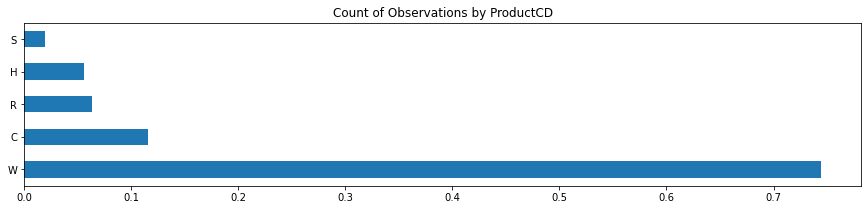

In [76]:
train["ProductCD"].value_counts(dropna=False, normalize=True)\
.plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

In [250]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 381 columns.
Test dataset has 506691 rows and 380 columns.


In [215]:
print(train.columns.tolist())


['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88'

## Transfer “TransactionDT”
The variabele “TransactionDT” in the Transaction dataset is a timedelta from a given reference datetime (not an actual timestamp). The minimum value of “TransactionDT” is 86400 which corresponds to the number of seconds in a day (60*60*24 = 86400). Therefore, it is possible the unit of this variable is seconds. The maximum value of “TransactionDT” is 15811131. It is reasonable to conclude that the data spans 6 months (15811131-86400)/86400/30 = 6.066. 

In [320]:
train['TransactionDT'].value_counts()

9474817     8
11576951    5
7236588     5
4397066     5
8468062     4
           ..
1297707     1
1309997     1
257327      1
11738417    1
8388608     1
Name: TransactionDT, Length: 573349, dtype: int64

In [321]:
print('The maximum value of TransactionDT is: ',train['TransactionDT'].max())
print('The minmun value of TransactionDT is: ',train['TransactionDT'].min())

The maximum value of TransactionDT is:  15811131
The minmun value of TransactionDT is:  86400


## (1) Transfer the unit of 'TransactionDT' from seconds to days

In [322]:
train['TransactionDT'] = (train['TransactionDT']/(60*60*24)).round(0)
train['TransactionDT'].value_counts()

93.0     6917
23.0     6847
25.0     6529
24.0     5868
22.0     5792
         ... 
150.0    2232
144.0    2210
179.0    2064
183.0    2017
1.0      1264
Name: TransactionDT, Length: 183, dtype: int64

In [323]:
test['TransactionDT'] = (test['TransactionDT']/(60*60*24)).round(0)
test['TransactionDT'].value_counts()

390.0    7313
387.0    5714
386.0    4946
385.0    4862
383.0    4650
         ... 
358.0    1923
297.0    1916
255.0    1844
396.0    1719
213.0     551
Name: TransactionDT, Length: 184, dtype: int64

## (2) Add a new column 'Trans_DayOfWeek' transfer the TransactionDT to day of week

In [324]:
train['Trans_DayOfWeek'] = (train['TransactionDT']%7).round(0)
train['Trans_DayOfWeek'].value_counts()

2.0    97839
1.0    86558
5.0    86301
0.0    85459
6.0    83766
3.0    75357
4.0    75260
Name: Trans_DayOfWeek, dtype: int64

In [325]:
test['Trans_DayOfWeek'] = (test['TransactionDT']%7).round(0)
test['Trans_DayOfWeek'].value_counts()

2.0    80306
5.0    80042
6.0    73931
0.0    72632
1.0    71150
4.0    65057
3.0    63573
Name: Trans_DayOfWeek, dtype: int64

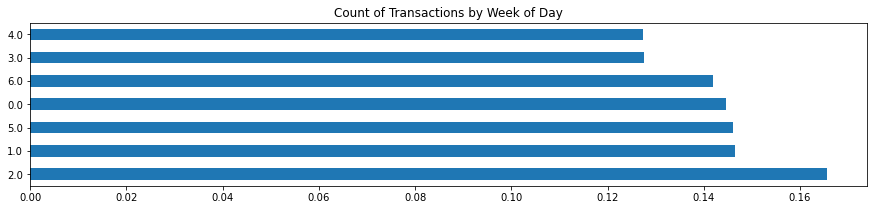

In [326]:
train['Trans_DayOfWeek'].value_counts(dropna=False, normalize=True)\
.plot(kind='barh',
          figsize=(15, 3),
         title='Count of Transactions by Week of Day')
plt.show()

## (3) Add a new column 'Trans_hours' transfer the TransactionDT to hours of day

In [327]:
train['Trans_hours'] = (train['TransactionDT']%24).round(0)
train['Trans_hours'].value_counts()

21.0    27292
2.0     26877
5.0     26148
1.0     26117
4.0     25518
6.0     25317
3.0     25268
11.0    24958
10.0    24765
13.0    24712
14.0    24544
20.0    24428
12.0    24391
0.0     24286
9.0     24198
23.0    24154
15.0    24078
7.0     24047
8.0     23993
22.0    23880
19.0    23598
16.0    23015
17.0    22808
18.0    22148
Name: Trans_hours, dtype: int64

In [328]:
test['Trans_hours'] = (test['TransactionDT']%24).round(0)
test['Trans_hours'].value_counts()

6.0     25509
2.0     23967
5.0     23585
3.0     23506
1.0     23094
7.0     23093
0.0     22727
9.0     22387
4.0     22382
23.0    22309
10.0    22195
8.0     22107
11.0    21519
22.0    20414
12.0    19870
21.0    19260
20.0    18975
16.0    18802
18.0    18791
19.0    18784
15.0    18699
17.0    18513
13.0    18152
14.0    18051
Name: Trans_hours, dtype: int64

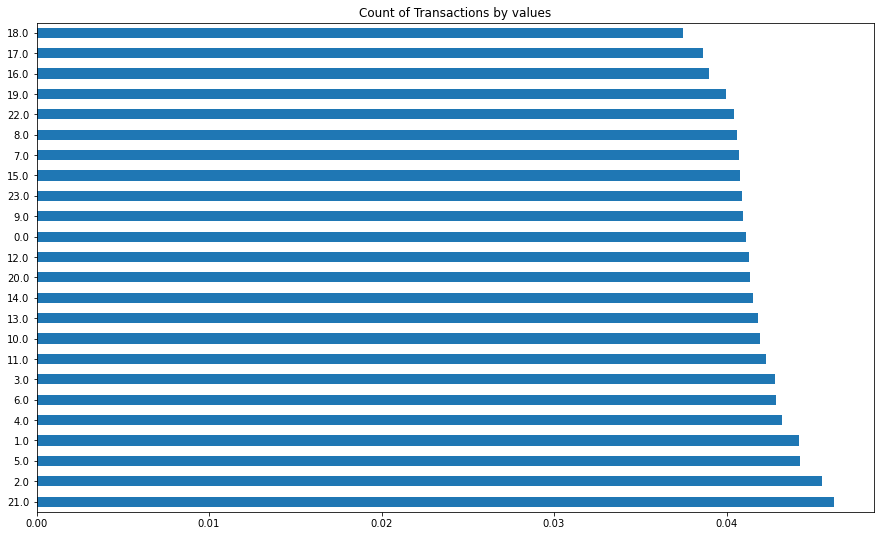

In [270]:
train['Trans_hours'].value_counts(dropna=False, normalize=True)\
.plot(kind='barh',
          figsize=(15, 9),
         title='Count of Transactions by values')
plt.show()

In [329]:
train.to_csv("train.csv", index = False)
test.to_csv("test.csv", index= False)

In [34]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Transforming categorical features --- Label Encoding


In [35]:
col_object = train.dtypes[train.dtypes == 'object']
print(col_object)

ProductCD        object
card4            object
card6            object
P_emaildomain    object
R_emaildomain    object
M1               object
M2               object
M3               object
M4               object
M5               object
M6               object
M7               object
M8               object
M9               object
id_12            object
id_15            object
id_16            object
id_23            object
id_27            object
id_28            object
id_29            object
id_30            object
id_31            object
id_33            object
id_34            object
id_35            object
id_36            object
id_37            object
id_38            object
DeviceType       object
DeviceInfo       object
dtype: object


In [36]:
col_o_list = col_object.to_frame().index.tolist()
# Assigning numerical values 
for col in col_o_list:
    train[col] = train[col].astype('category')  # converting type of columns to 'category'
    train[col] = train[col].cat.codes   #Using category codes approach:
    #for test
    test[col] = test[col].astype('category') 
    test[col] = test[col].cat.codes 
    


In [37]:
test['ProductCD']

0         4
1         4
2         4
3         4
4         4
         ..
506686    0
506687    0
506688    4
506689    4
506690    0
Name: ProductCD, Length: 506691, dtype: int8

In [38]:
train['id_33'].isnull().sum()

0

In [39]:
train['id_33']  # null is replaced by -1

0          -1
1          -1
2          -1
3          -1
4         164
         ... 
590535     -1
590536     -1
590537     -1
590538     -1
590539     -1
Name: id_33, Length: 590540, dtype: int16

In [40]:
train.shape

(590540, 383)

## Tackling Class imbalance

/Users/wanlin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

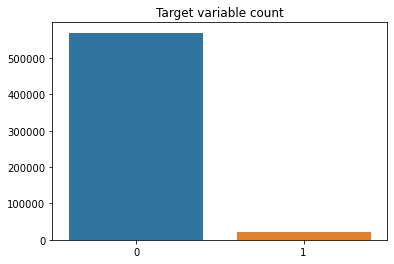

In [41]:
%matplotlib inline
x=train['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

### 1. Splitting to train and validation
A very important idea: it seems that train and test transaction dates don't overlap, so it would be prudent to use time-based split for validation. This was already noted in abother kernel: https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda

In [42]:
# We now split the train dataset into train and validation set.
# We keeep 20% of data for validation.
from sklearn.model_selection import train_test_split
X = train.drop('isFraud', axis = 1)
y = train['isFraud']
X_train,X_validation,y_train,y_validation =train_test_split(X,y,test_size=.2,random_state=1)

In [43]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_validation: ',X_validation.shape)
print('y_validation: ',y_validation.shape)

X_train:  (472432, 382)
y_train:  (472432,)
X_validation:  (118108, 382)
y_validation:  (118108,)


### 2. Tackling Class imbalance only for training data

In [44]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train.shape

(472432, 383)

In [45]:
df_validation = pd.concat([X_validation,y_validation],axis=1)
df_validation.shape

(118108, 383)

In [46]:
test.shape

(506691, 382)

In [47]:
df_train.to_csv("df_train.csv", index = False)
df_validation.to_csv("df_validation.csv", index= False)

In [4]:
df_train = pd.read_csv("df_train.csv")
df_validation = pd.read_csv("df_validation.csv")

### Undersample majority class (for training dataset only)
removing some observations of the majority class

In [48]:
not_fraud=df_train[df_train.isFraud==0]
fraud=df_train[df_train.isFraud==1]

In [49]:
from sklearn.utils import resample

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 2) # reproducible results

# combine minority and downsampled majority
train_downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
train_downsampled.isFraud.value_counts()

1    16529
0    16529
Name: isFraud, dtype: int64

Text(0, 0.5, 'count')

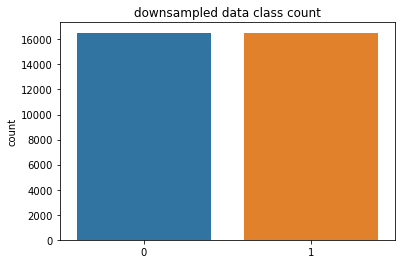

In [50]:
y=train_downsampled.isFraud.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

### Solution 2: Oversample minority class (for training dataset only)

In [7]:
from sklearn.utils import resample

fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=3) # reproducible results

# combine majority and upsampled minority
train_upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
train_upsampled.isFraud.value_counts()

1    455903
0    455903
Name: isFraud, dtype: int64

Text(0, 0.5, 'count')

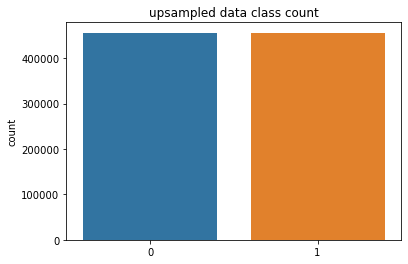

In [9]:
%matplotlib inline
y=train_upsampled.isFraud.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

### To reduce the  computational stress, the next step will use the dataframe generated by Undersampling


In [12]:
del train_upsampled

In [51]:
train_downsampled.shape

(33058, 383)

In [54]:
train_downsampled.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Trans_DayOfWeek,Trans_hours,isFraud
118998,3105998,27.0,59.00,4,6951,111.0,150.0,3,226.0,2,...,-1,-1,-1,-1,-1,-1,-1,6.0,3.0,0
250798,3237798,69.0,261.95,4,12583,404.0,150.0,2,102.0,1,...,-1,-1,-1,-1,-1,-1,-1,6.0,21.0,0
383911,3370911,111.0,117.00,4,8394,490.0,150.0,3,226.0,2,...,-1,-1,-1,-1,-1,-1,-1,6.0,15.0,0
22683,3009683,7.0,100.00,4,17188,321.0,150.0,3,226.0,2,...,-1,-1,-1,-1,-1,-1,-1,0.0,7.0,0
25010,3012010,8.0,300.00,4,9323,111.0,150.0,3,226.0,2,...,-1,-1,-1,-1,-1,-1,-1,1.0,8.0,0


In [55]:
train_downsampled.set_index('TransactionID',inplace=True)

In [56]:
train_downsampled.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Trans_DayOfWeek,Trans_hours,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,
3105998,27.0,59.00,4,6951,111.0,150.0,3,226.0,2,441.0,...,-1,-1,-1,-1,-1,-1,-1,6.0,3.0,0
3237798,69.0,261.95,4,12583,404.0,150.0,2,102.0,1,330.0,...,-1,-1,-1,-1,-1,-1,-1,6.0,21.0,0
3370911,111.0,117.00,4,8394,490.0,150.0,3,226.0,2,325.0,...,-1,-1,-1,-1,-1,-1,-1,6.0,15.0,0
3009683,7.0,100.00,4,17188,321.0,150.0,3,226.0,2,122.0,...,-1,-1,-1,-1,-1,-1,-1,0.0,7.0,0
3012010,8.0,300.00,4,9323,111.0,150.0,3,226.0,2,191.0,...,-1,-1,-1,-1,-1,-1,-1,1.0,8.0,0


## Missing value imputation --- K-Nearest Neighbors imputation method
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

### 1. Transforming categorical features (have done)
One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values.

### 2. normalize data --- Scikit-Learn’s MinMaxScaler
Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values.

In [14]:
col_object = train.dtypes[train.dtypes == 'object']
col_o_list = col_object.to_frame().index.tolist()


In [57]:
list_noNorm = ['isFraud', 'TransactionDT','Trans_DayOfWeek', 'Trans_hours']
list_noNorm.extend(col_o_list)
print(list_noNorm)

['isFraud', 'TransactionDT', 'Trans_DayOfWeek', 'Trans_hours', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [58]:
data_forNorm = train_downsampled.drop(list_noNorm, axis = 1)
print(len(data_forNorm.columns))
data_forNorm.columns

347


Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'dist1', 'dist2', 'C1',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=347)

In [59]:
data_forNorm.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionID,,,,,,,,,,,,,,,,,,,,,
3105998,59.00,6951,111.0,150.0,226.0,441.0,87.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237798,261.95,12583,404.0,150.0,102.0,330.0,87.0,8.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3370911,117.00,8394,490.0,150.0,226.0,325.0,87.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009683,100.00,17188,321.0,150.0,226.0,122.0,87.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3012010,300.00,9323,111.0,150.0,226.0,191.0,87.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data_objet = train_downsampled[list_noNorm]
data_objet.head()

,isFraud,TransactionDT,Trans_DayOfWeek,Trans_hours,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3105998,0,27.0,6.0,3.0,4,3,2,10,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3237798,0,69.0,6.0,21.0,4,2,1,16,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3370911,0,111.0,6.0,15.0,4,3,2,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3009683,0,7.0,0.0,7.0,4,3,2,6,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3012010,0,8.0,1.0,8.0,4,3,2,15,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


train_downsampled is separated into 'data_forNorm' and 'data_objet'. we do K-Nearest Neighbors imputation only for 'data_forNorm'

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_col_numeric = pd.DataFrame(scaler.fit_transform(data_forNorm), columns = data_forNorm.columns)
train_col_numeric.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,0.001838,0.341754,0.022,0.381679,0.919708,0.782110,0.846154,NaN,NaN,0.000214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008193,0.665842,0.608,0.381679,0.014599,0.527523,0.846154,0.001619,NaN,0.000428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003654,0.424790,0.780,0.381679,0.919708,0.516055,0.846154,NaN,NaN,0.000428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003122,0.930832,0.442,0.381679,0.919708,0.050459,0.846154,NaN,NaN,0.000428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.009384,0.478248,0.022,0.381679,0.919708,0.208716,0.846154,NaN,NaN,0.000428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. KNN Imputation
 we are setting the parameter ‘n_neighbors’ as 5. So,the missing values will be replaced by the mean value of 5 nearest neighbors measured by Euclidean distance.

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
train_knnImputer = pd.DataFrame(imputer.fit_transform(train_col_numeric),columns = data_forNorm.columns)
train_knnImputer.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,0.001838,0.341754,0.022,0.381679,0.919708,0.782110,0.846154,0.020801,0.023136,0.000214,...,0.523810,0.211111,0.307909,0.426212,0.319920,0.1,0.180000,0.559459,0.493966,0.875
1,0.008193,0.665842,0.608,0.381679,0.014599,0.527523,0.846154,0.001619,0.134842,0.000428,...,0.486508,0.233333,0.684007,0.389767,0.368127,0.0,0.093333,0.479505,0.615517,0.775
2,0.003654,0.424790,0.780,0.381679,0.919708,0.516055,0.846154,0.053379,0.024864,0.000428,...,0.566667,0.172222,0.481371,0.673070,0.247942,0.0,0.086667,0.465090,0.476724,0.875
3,0.003122,0.930832,0.442,0.381679,0.919708,0.050459,0.846154,0.011594,0.011780,0.000428,...,0.583333,0.233333,0.497012,0.466607,0.293758,0.0,0.206667,0.668694,0.456897,0.850
4,0.009384,0.478248,0.022,0.381679,0.919708,0.208716,0.846154,0.024423,0.079282,0.000428,...,0.523810,0.150000,0.566784,0.515081,0.278088,0.0,0.113333,0.519820,0.418103,0.850


In [70]:
data_objet.reset_index(inplace=True)
data_objet.head()

,TransactionID,isFraud,TransactionDT,Trans_DayOfWeek,Trans_hours,ProductCD,card4,card6,P_emaildomain,R_emaildomain,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3105998,0,27.0,6.0,3.0,4,3,2,10,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,3237798,0,69.0,6.0,21.0,4,2,1,16,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3370911,0,111.0,6.0,15.0,4,3,2,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,3009683,0,7.0,0.0,7.0,4,3,2,6,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,3012010,0,8.0,1.0,8.0,4,3,2,15,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [71]:
train = pd.concat([train_knnImputer,data_objet],axis=1)
train.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0.001838,0.341754,0.022,0.381679,0.919708,0.782110,0.846154,0.020801,0.023136,0.000214,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0.008193,0.665842,0.608,0.381679,0.014599,0.527523,0.846154,0.001619,0.134842,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0.003654,0.424790,0.780,0.381679,0.919708,0.516055,0.846154,0.053379,0.024864,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0.003122,0.930832,0.442,0.381679,0.919708,0.050459,0.846154,0.011594,0.011780,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0.009384,0.478248,0.022,0.381679,0.919708,0.208716,0.846154,0.024423,0.079282,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [73]:
train.shape

(33058, 383)

In [74]:
df_validation.shape

(118108, 383)

In [75]:
test.shape

(506691, 382)

In [76]:
train.to_csv("train_normalization_KnnFillNan.csv", index = False)

## Feature selection/extraction

In [79]:
# since id that cannot be used for classificaiton 
train.set_index('TransactionID',inplace=True)

In [80]:
train.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3105998,0.001838,0.341754,0.022,0.381679,0.919708,0.782110,0.846154,0.020801,0.023136,0.000214,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3237798,0.008193,0.665842,0.608,0.381679,0.014599,0.527523,0.846154,0.001619,0.134842,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3370911,0.003654,0.424790,0.780,0.381679,0.919708,0.516055,0.846154,0.053379,0.024864,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3009683,0.003122,0.930832,0.442,0.381679,0.919708,0.050459,0.846154,0.011594,0.011780,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3012010,0.009384,0.478248,0.022,0.381679,0.919708,0.208716,0.846154,0.024423,0.079282,0.000428,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [84]:
y = train.isFraud
x = train.drop('isFraud',axis=1)
print(x.shape)
y.shape

(33058, 381)


(33058,)

In [90]:
print(x.columns.tolist())
len(x.columns.tolist())

['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110

381

## Visualization: violin plot 
delete the features similiar in fraud and non-fraud

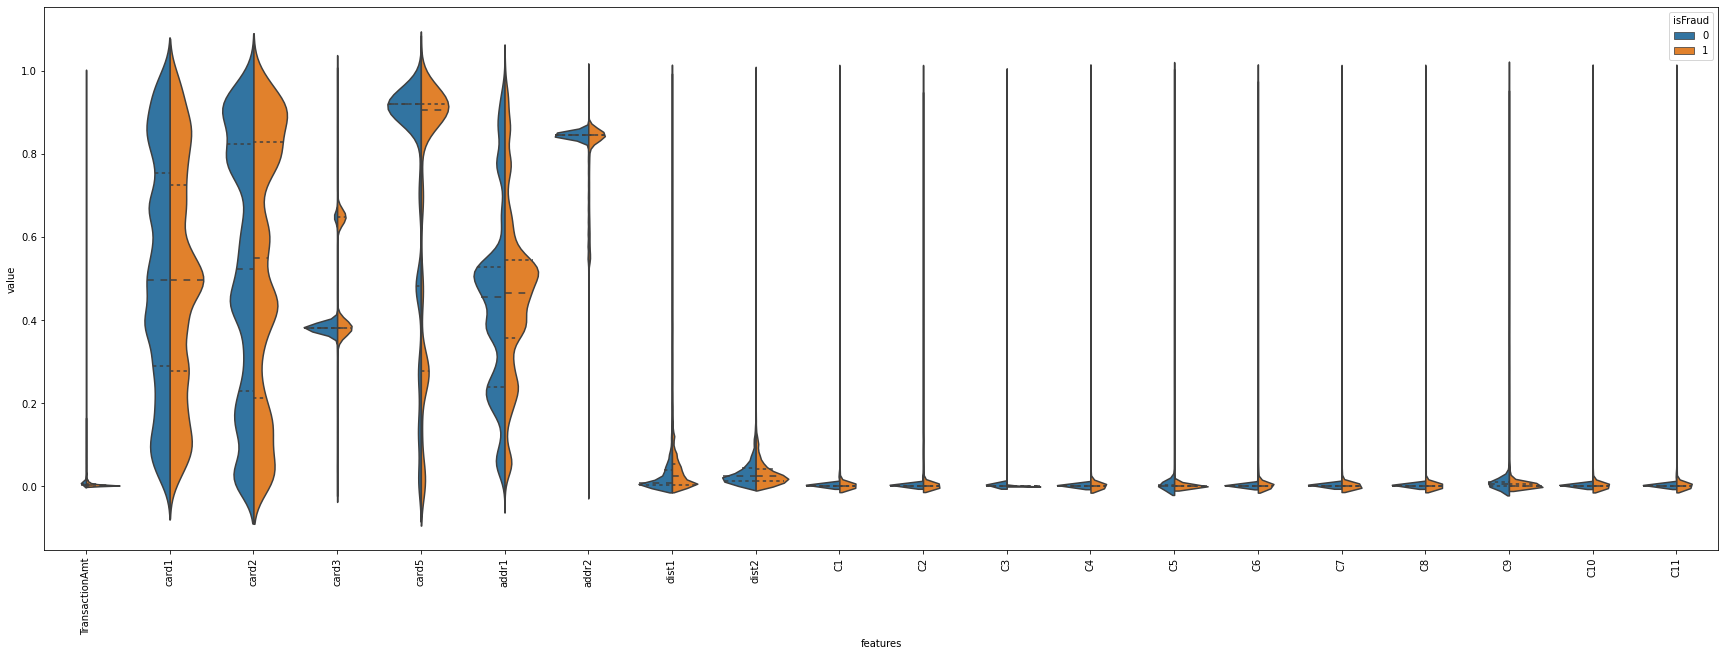

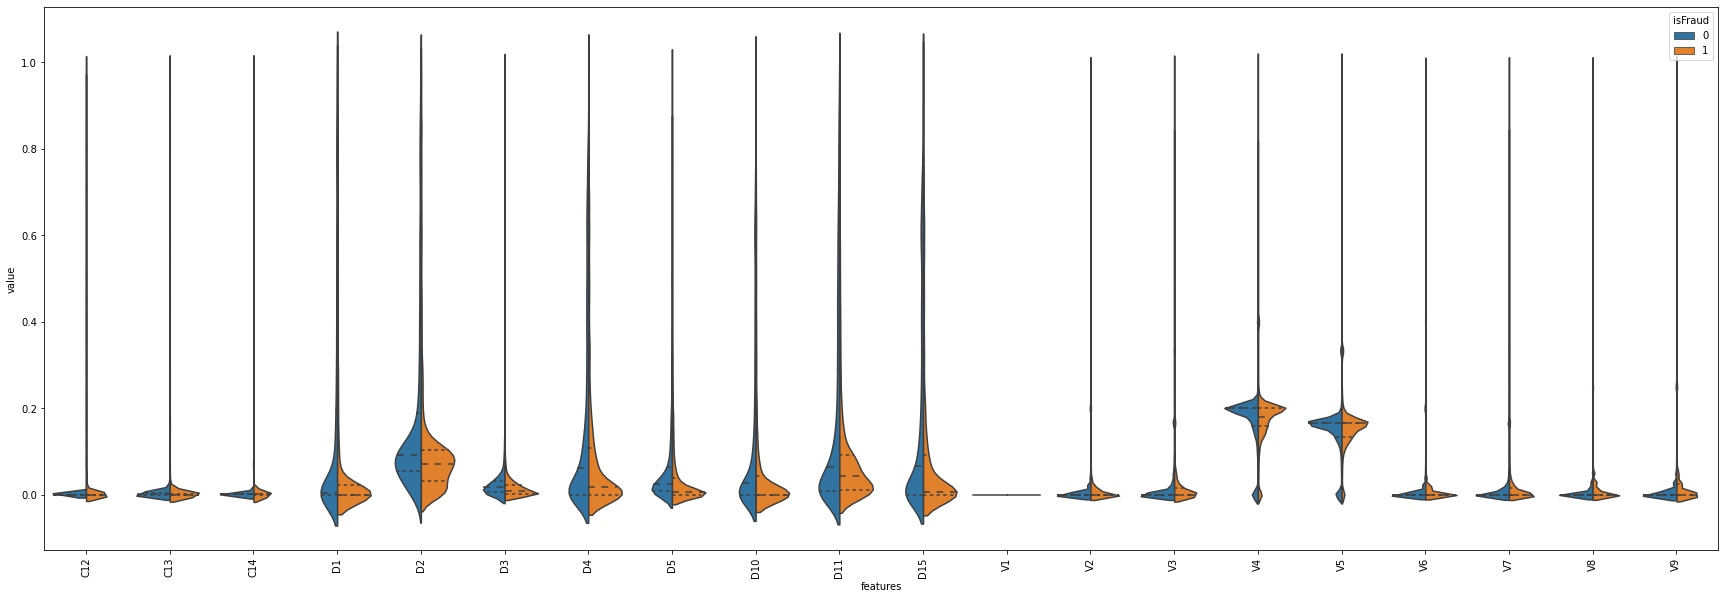

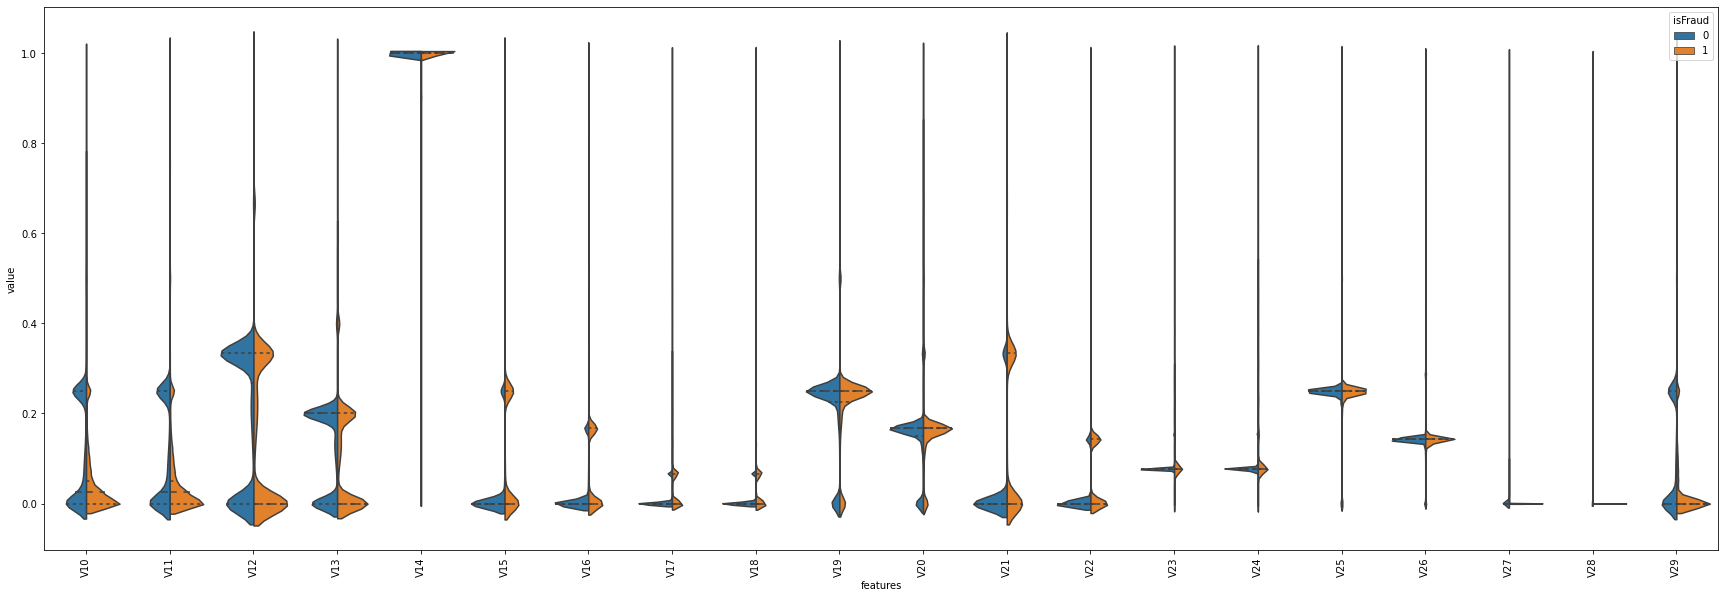

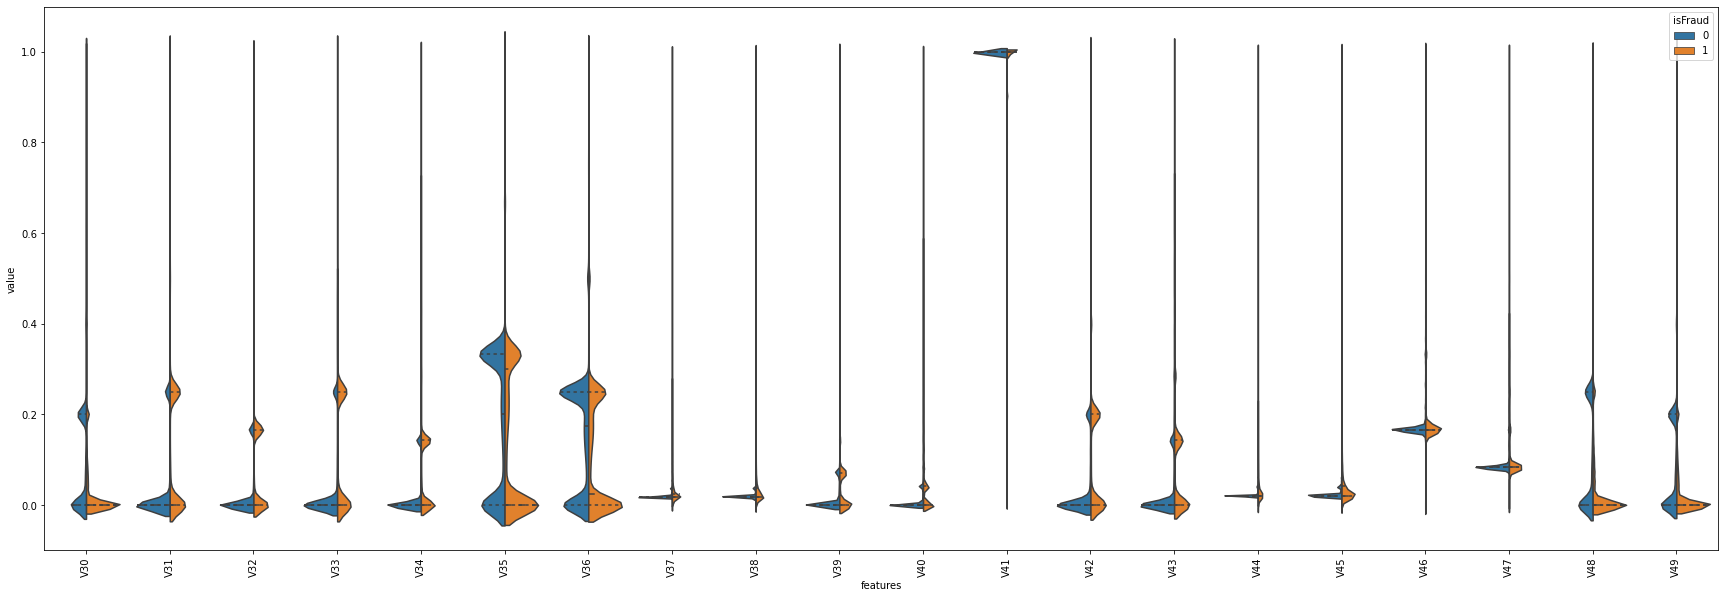

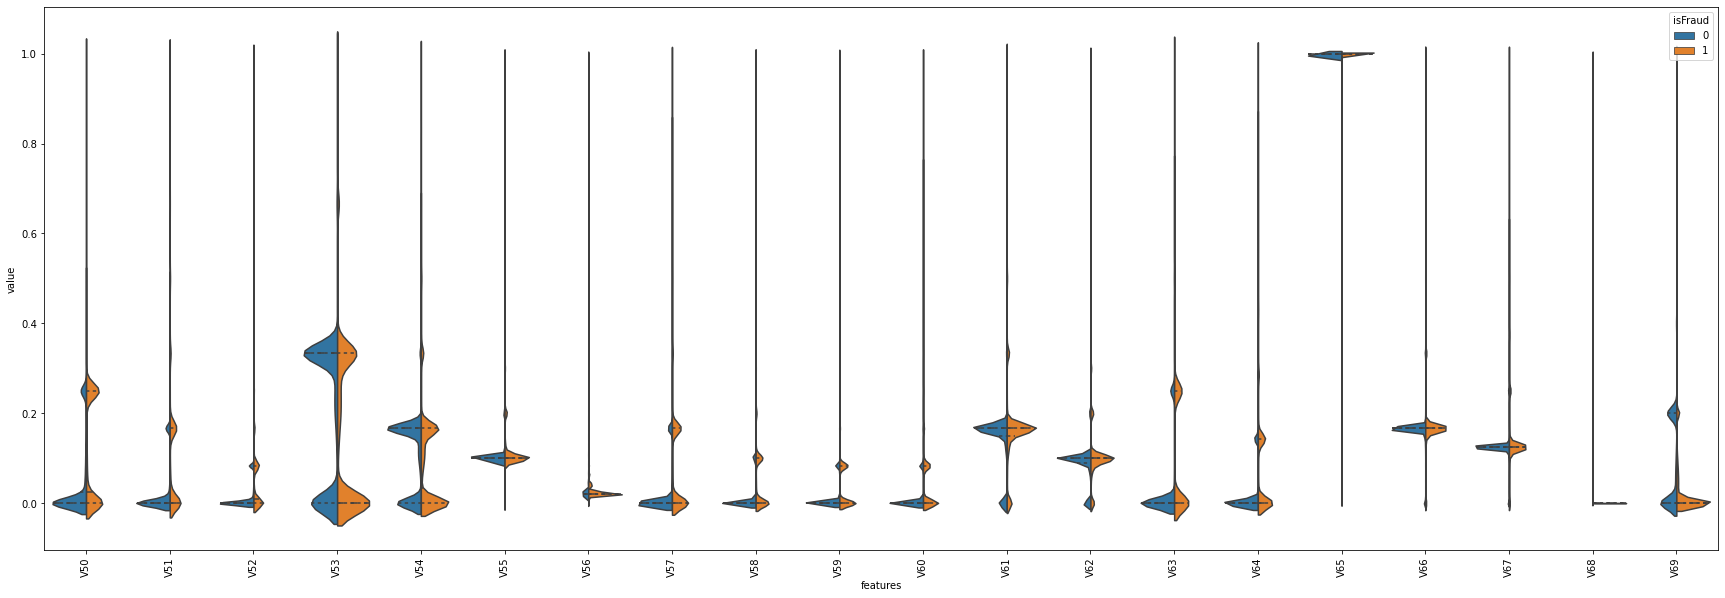

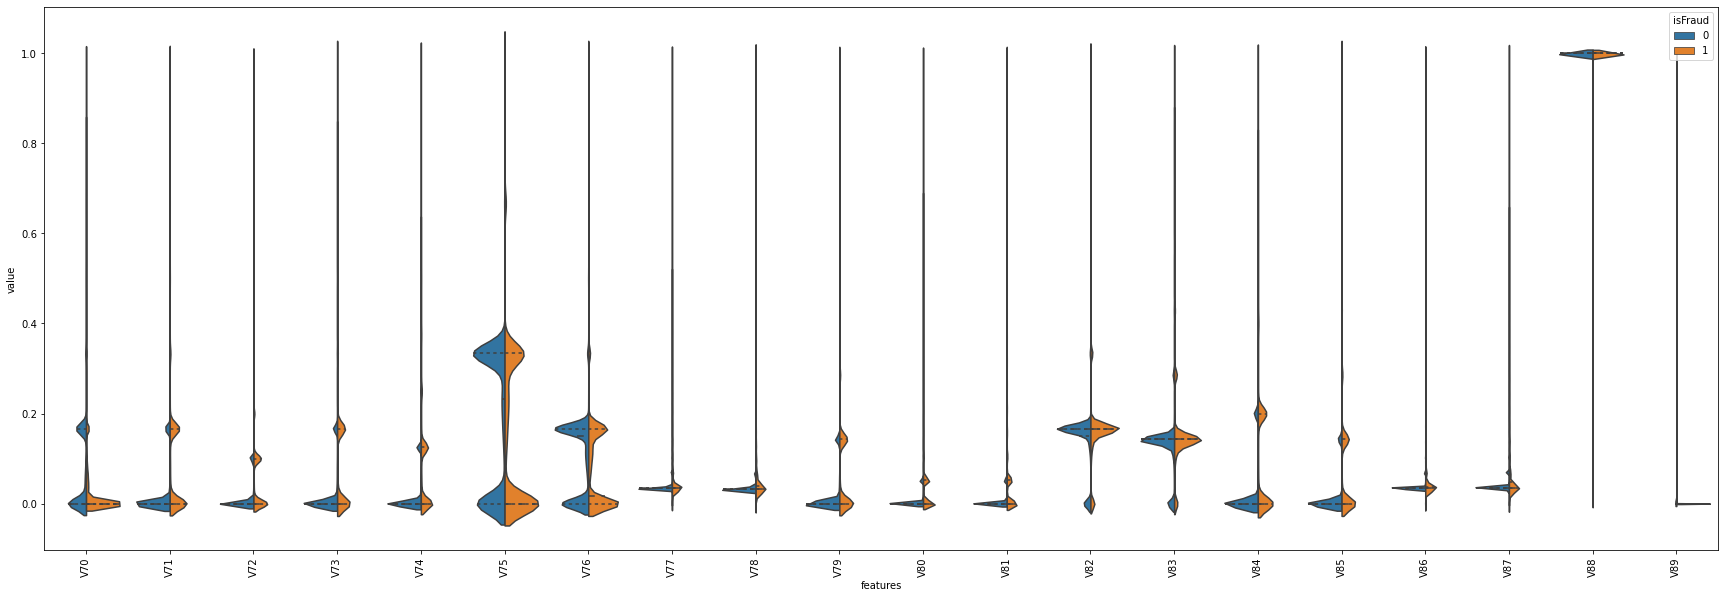

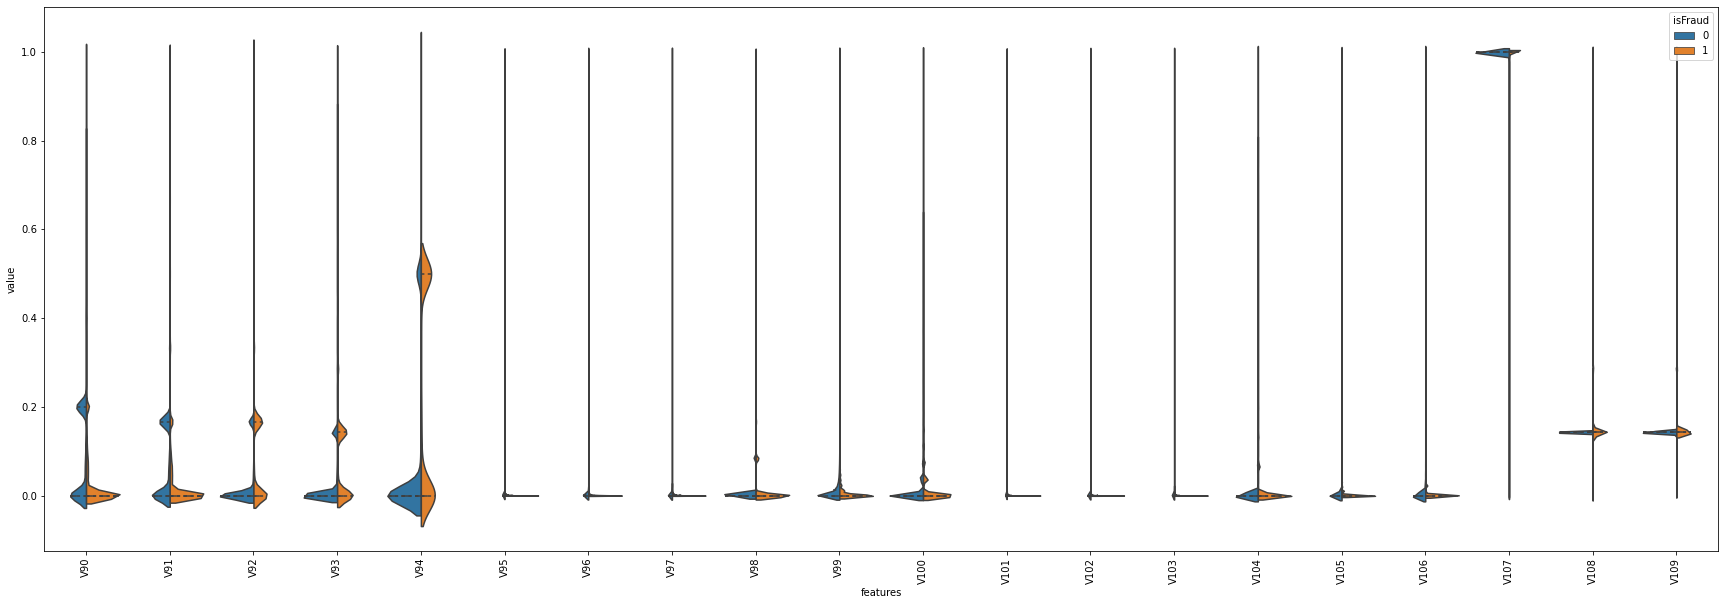

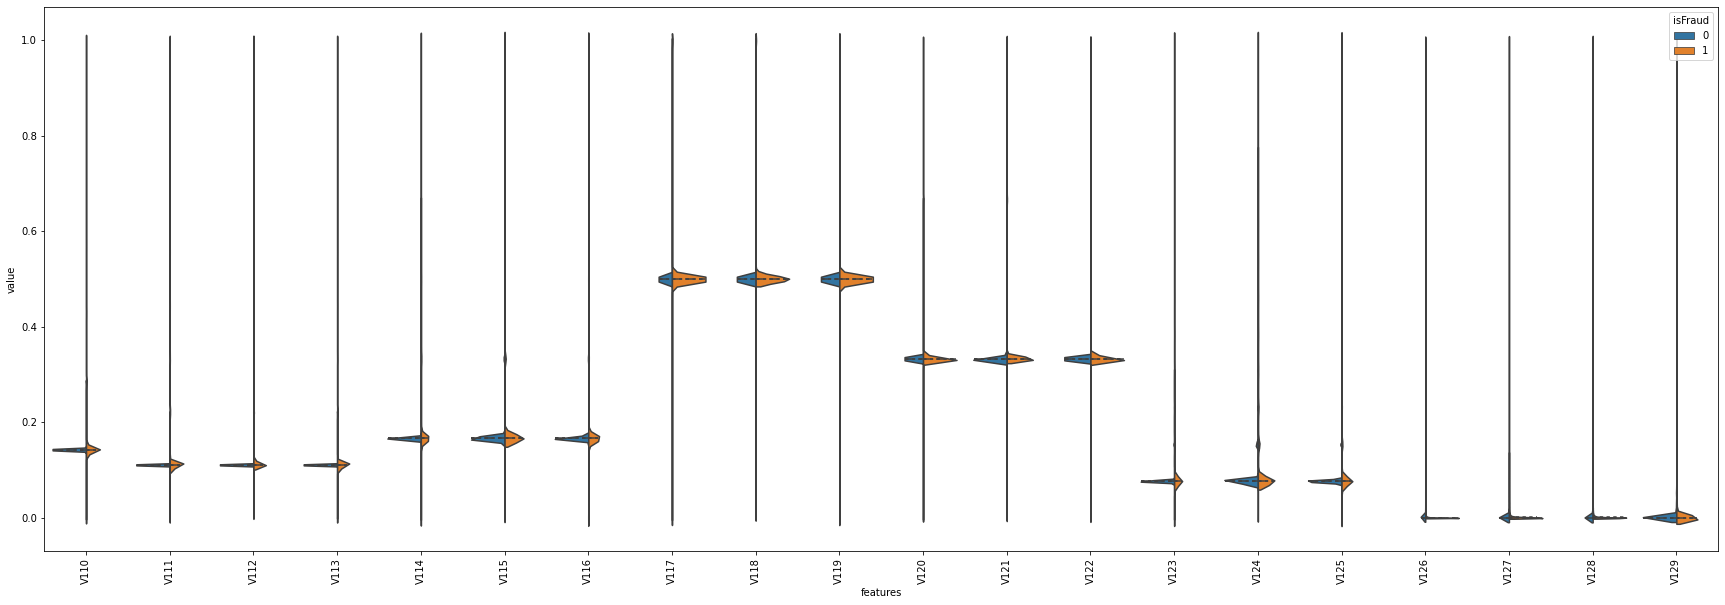

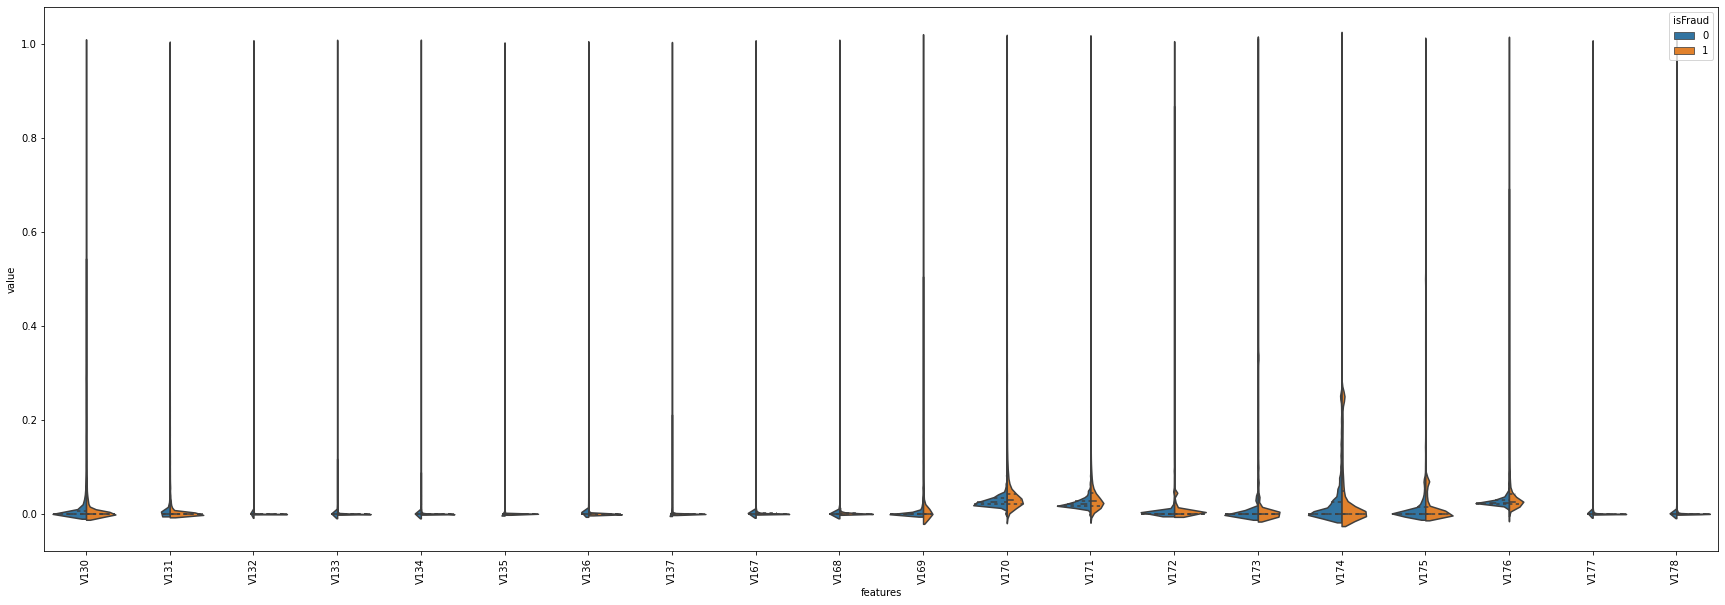

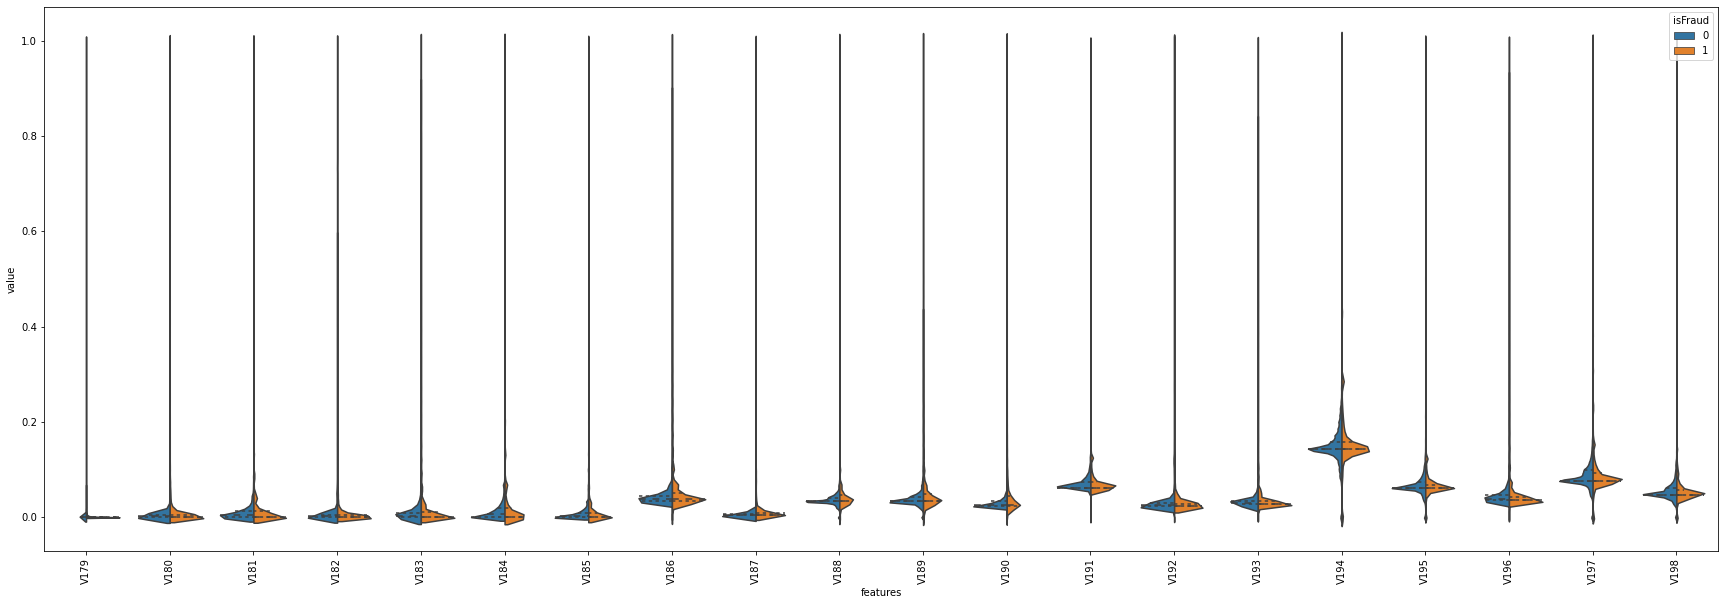

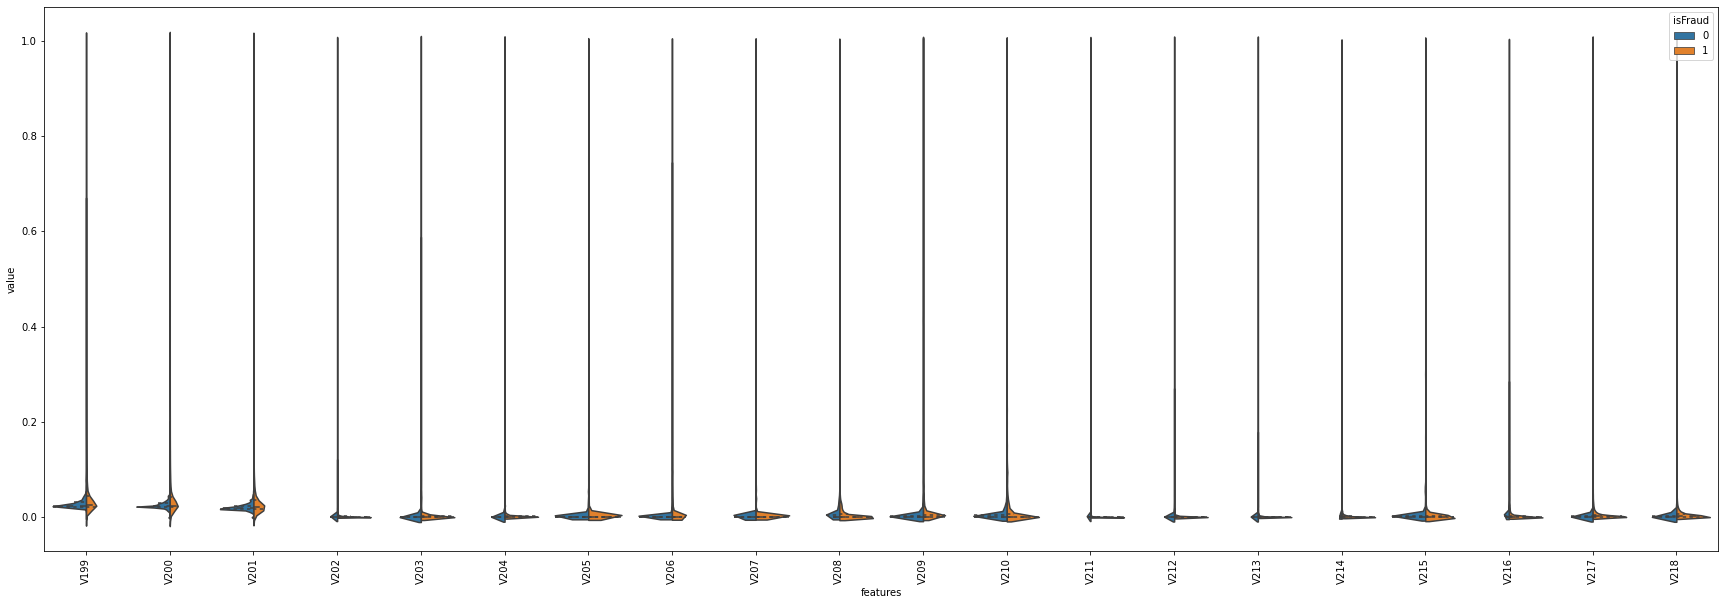

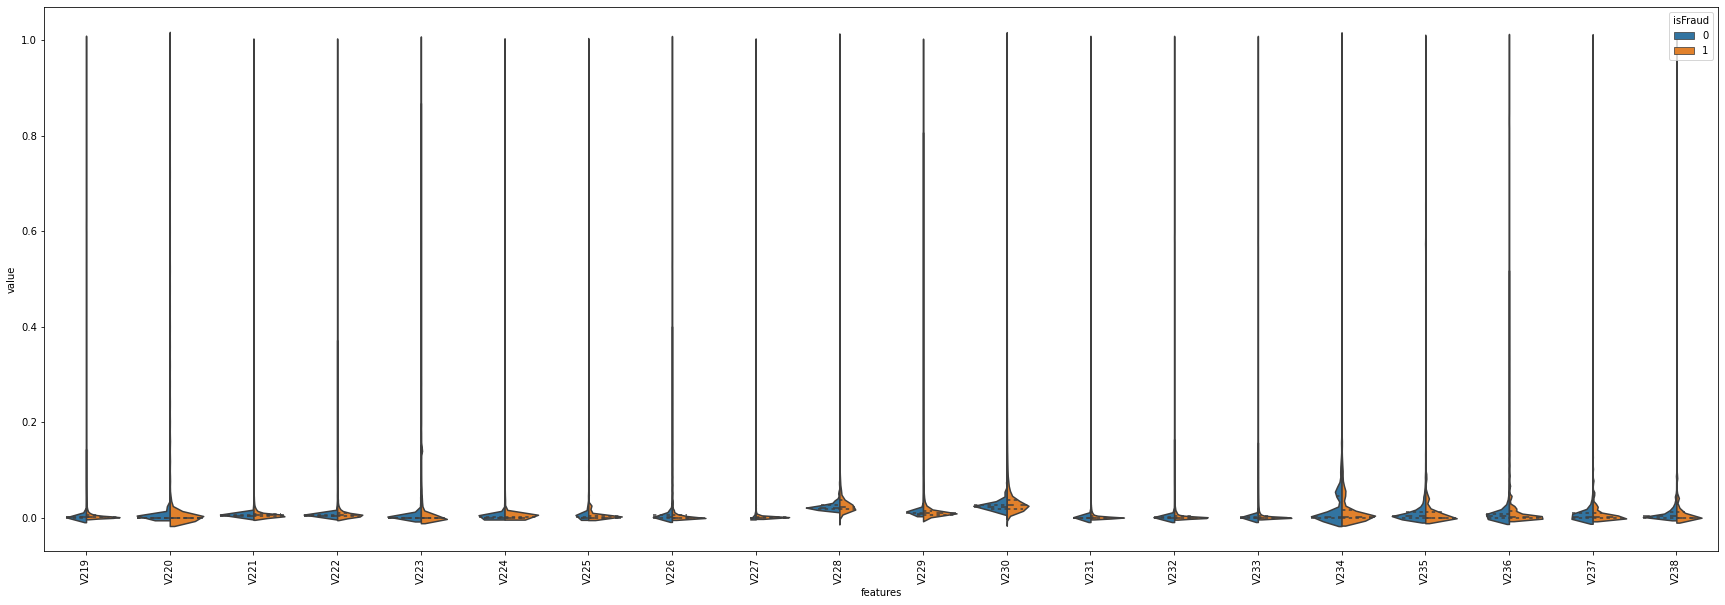

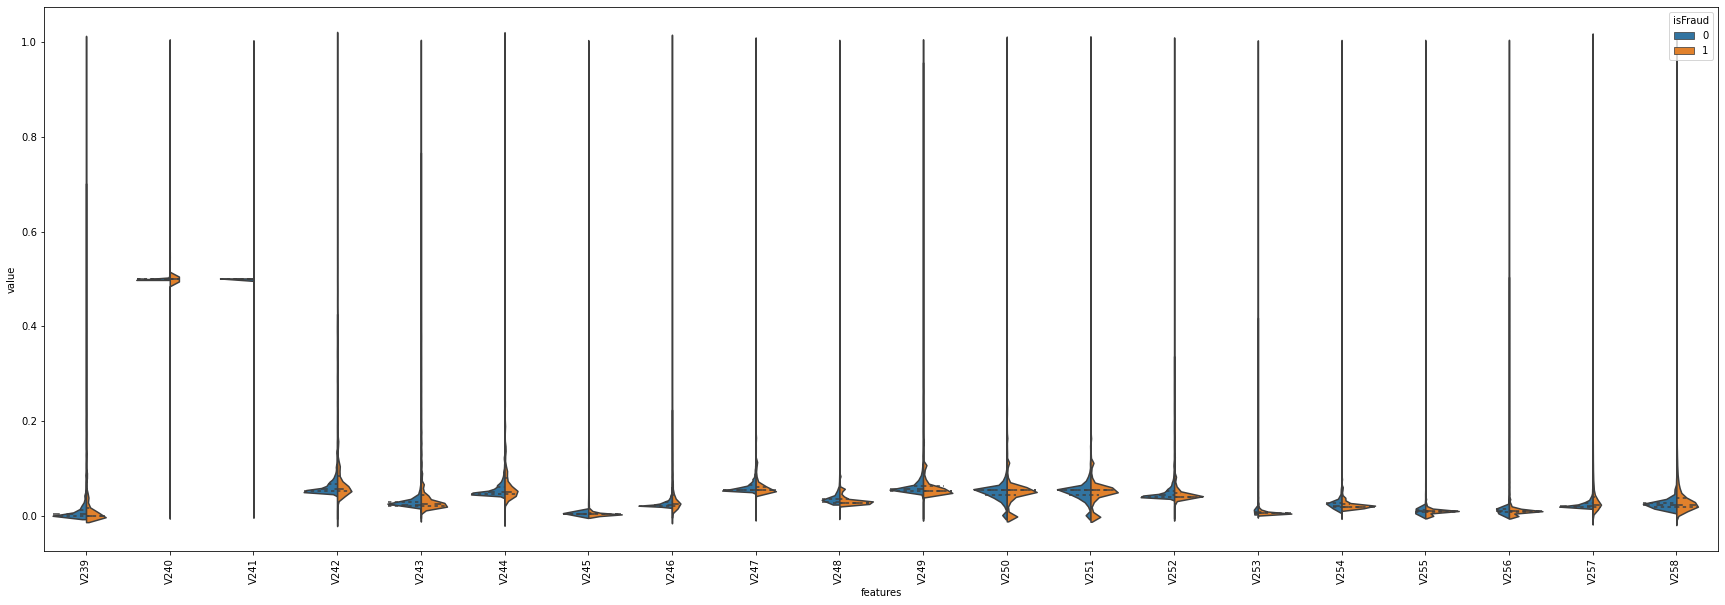

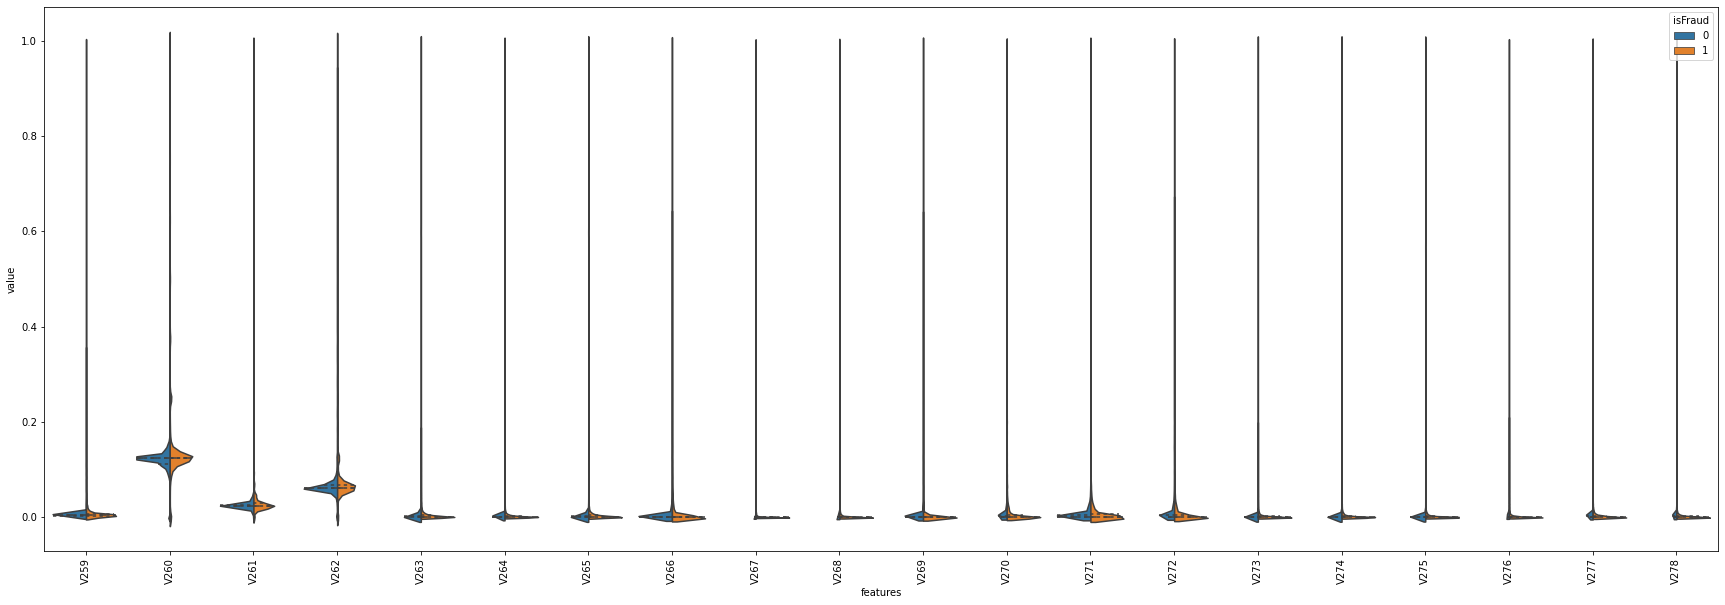

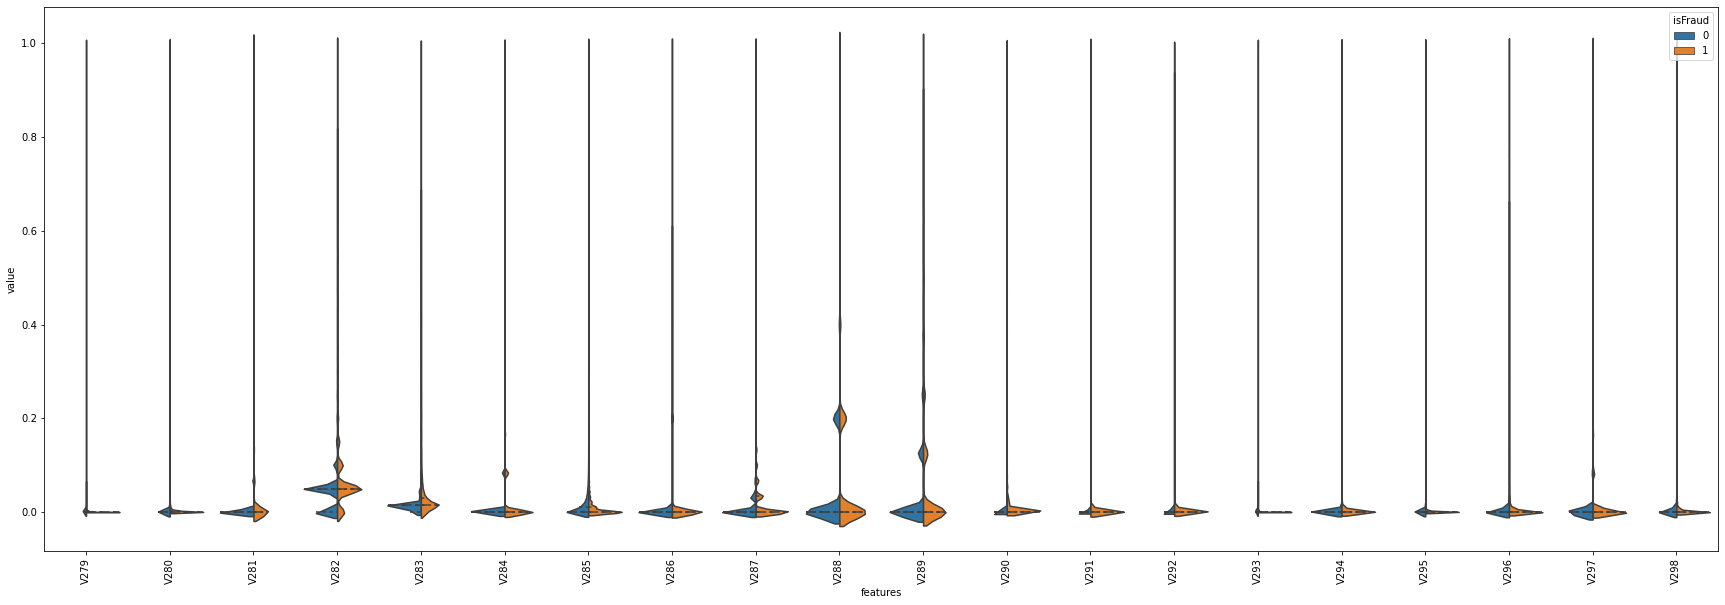

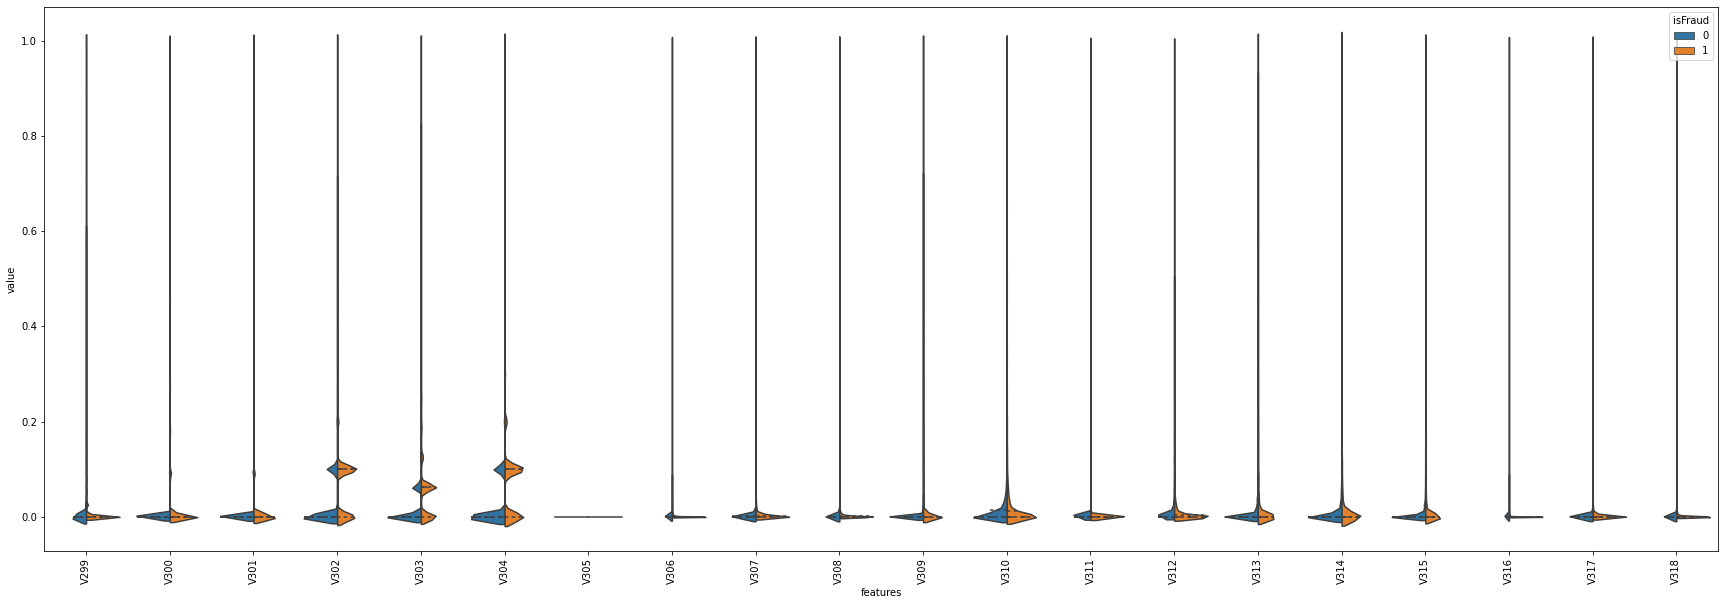

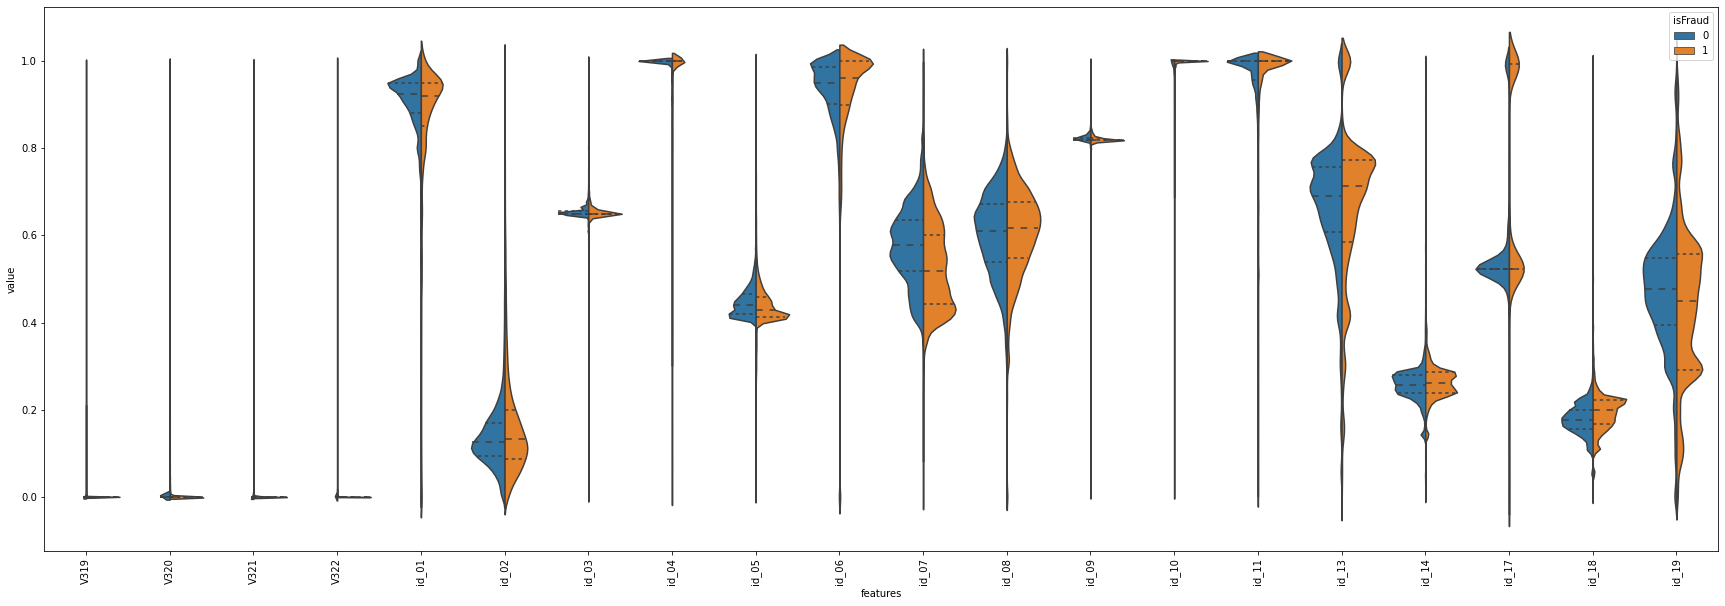

In [93]:
col=0
while col <= 320:
    data = pd.concat([y,x.iloc[:,col:col+20]],axis=1)
    data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(30,10))
    sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)
    col+=20

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'id_20'),
  Text(1, 0, 'id_21'),
  Text(2, 0, 'id_22'),
  Text(3, 0, 'id_24'),
  Text(4, 0, 'id_25'),
  Text(5, 0, 'id_26'),
  Text(6, 0, 'id_32')])

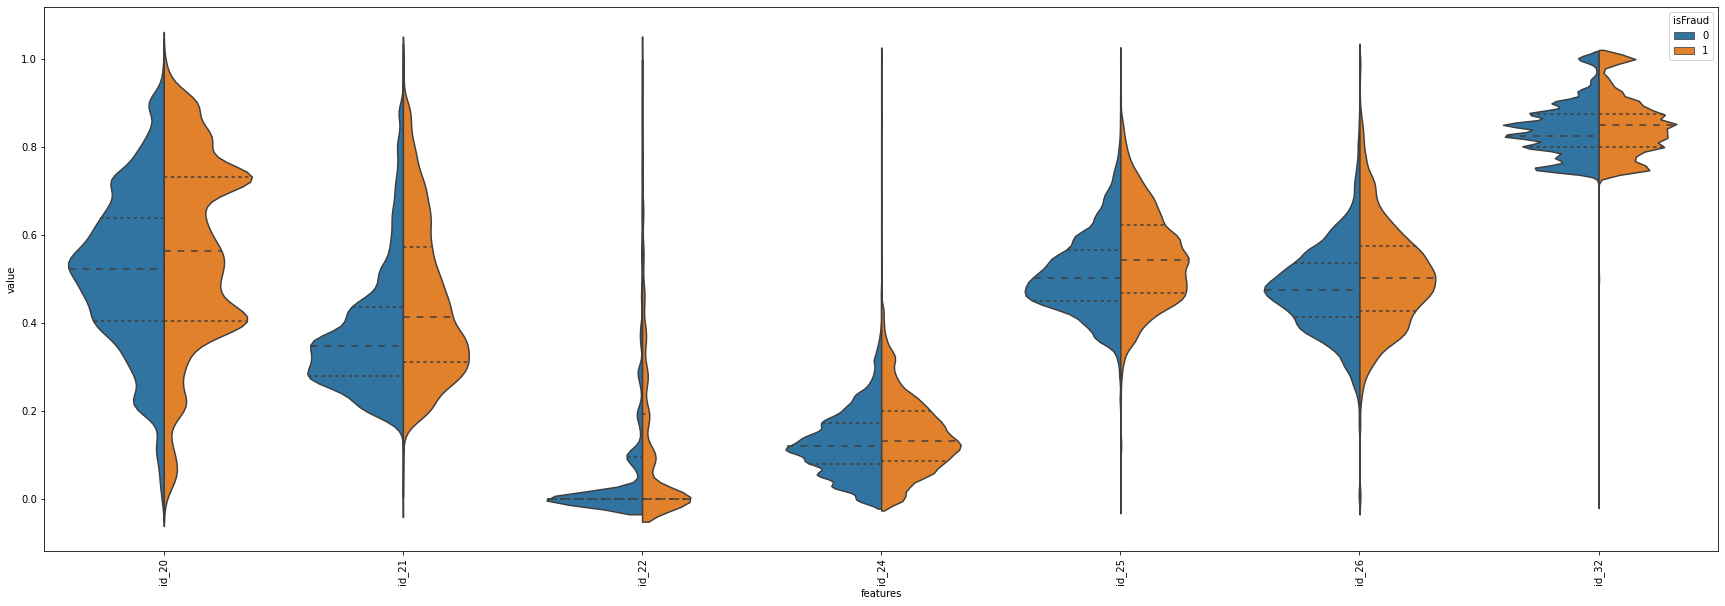

In [95]:
data = pd.concat([y,x.iloc[:,340:347]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(30,10))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Trans_DayOfWeek'), Text(1, 0, 'Trans_hours')])

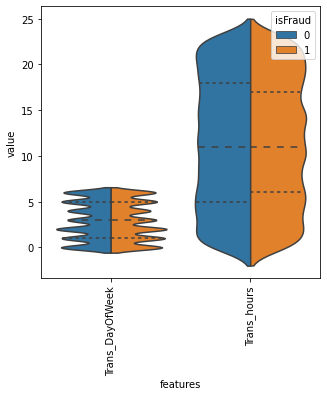

In [98]:
data = pd.concat([y,x.iloc[:,348:350]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(5,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'ProductCD'), Text(1, 0, 'card4'), Text(2, 0, 'card6')])

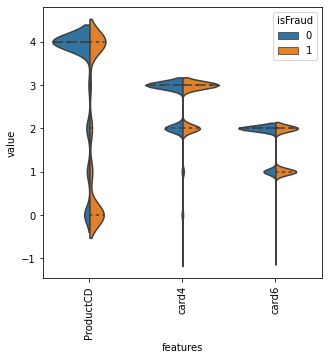

In [100]:
data = pd.concat([y,x.iloc[:,350:353]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(5,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'P_emaildomain'), Text(1, 0, 'R_emaildomain')])

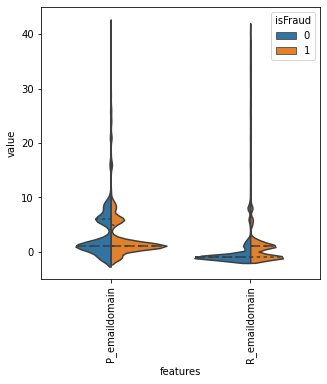

In [101]:
data = pd.concat([y,x.iloc[:,353:355]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(5,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'M1'),
  Text(1, 0, 'M2'),
  Text(2, 0, 'M3'),
  Text(3, 0, 'M4'),
  Text(4, 0, 'M5'),
  Text(5, 0, 'M6'),
  Text(6, 0, 'M7'),
  Text(7, 0, 'M8'),
  Text(8, 0, 'M9'),
  Text(9, 0, 'id_12'),
  Text(10, 0, 'id_15'),
  Text(11, 0, 'id_16'),
  Text(12, 0, 'id_23'),
  Text(13, 0, 'id_27'),
  Text(14, 0, 'id_28'),
  Text(15, 0, 'id_29'),
  Text(16, 0, 'id_30')])

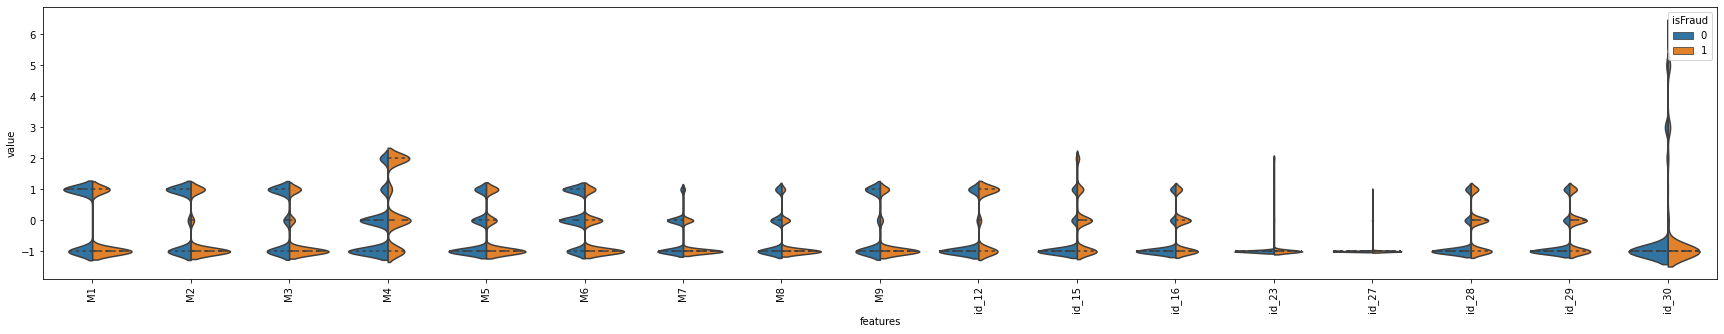

In [104]:
data = pd.concat([y,x.iloc[:,355:372]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(30,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'id_31'), Text(1, 0, 'id_33')])

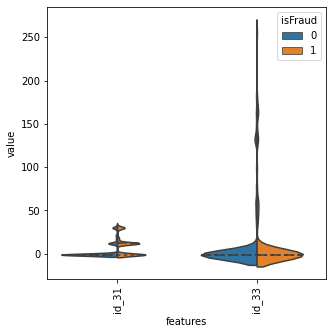

In [106]:
data = pd.concat([y,x.iloc[:,372:374]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(5,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'id_34'),
  Text(1, 0, 'id_35'),
  Text(2, 0, 'id_36'),
  Text(3, 0, 'id_37'),
  Text(4, 0, 'id_38'),
  Text(5, 0, 'DeviceType')])

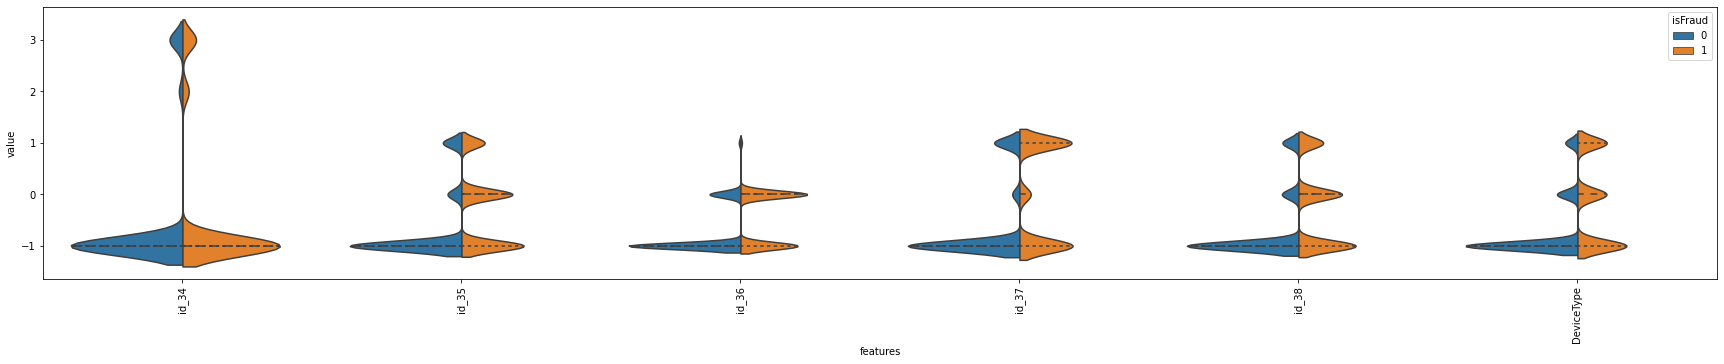

In [110]:
data = pd.concat([y,x.iloc[:,374:380]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(30,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'DeviceInfo')])

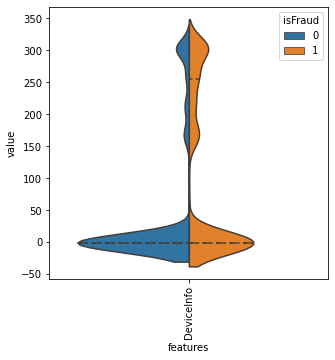

In [112]:
data = pd.concat([y,x.iloc[:,-1]],axis=1)
data = pd.melt(data,id_vars="isFraud",
                        var_name="features",
                        value_name='value')
plt.figure(figsize=(5,5))
sns.violinplot(x="features", y="value", hue="isFraud", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [113]:
droplist = ['dist2', 'C1', 'C2', 'C3', 'C4','V1', 
             'V6','V19', 'V20','V26', 'V61', 'V62', 'V88', 'V98',  'V100','V130', 'V172', 'V175', 'V180', 
            'V187', 'V192', 'V195', 'V197', 'V198', 'V205',  'V210', 'V215', 'V235','V266', 'V286', 'V294', 'V305','V310', 'Trans_DayOfWeek', 'card4',  'M5', 'id_27', 'id_33']


In [114]:
train = train.drop(droplist,axis=1)
validation = df_validation.drop(droplist,axis=1)
del df_validation
test = test.drop(droplist,axis=1)

In [115]:
train.shape

(33058, 344)

In [116]:
test.shape

(506691, 344)

In [117]:
validation.shape

(118108, 345)

In [120]:
validation.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,card6,addr1,...,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Trans_hours,isFraud
67316,3054316,18.0,50.00,2,7664,490.0,150.0,226.0,2,264.0,...,24.0,3,1,0,1,0,0,304,18.0,0
182840,3169840,47.0,29.00,4,14426,111.0,150.0,224.0,2,272.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,23.0,0
453616,3440616,134.0,57.95,4,12544,321.0,150.0,226.0,2,184.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,14.0,0
481992,3468992,145.0,54.50,4,8695,170.0,150.0,226.0,1,184.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,1.0,0
382076,3369076,111.0,29.00,4,3277,111.0,150.0,226.0,2,231.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,15.0,0


In [ ]:
y = train.isFraud
x = train.drop('isFraud',axis=1)
print(x.shape)
y.shape

References: 
https://www.kaggle.com/code/artgor/eda-and-models
https://www.kaggle.com/code/robikscube/ieee-fraud-detection-first-look-and-eda/notebook
https://www.kaggle.com/code/shahules/tackling-class-imbalance#notebook-container
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization